In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import cv2
import random

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


# 1. EDA

In [32]:
train_df = pd.read_csv('../input/fashion-mnist_train.csv')
test_df = pd.read_csv('../input/fashion-mnist_test.csv')
print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


In [33]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
feat_cols = train_df.columns.tolist()[1:]

In [35]:
image_df = train_df[feat_cols].values.reshape(-1,28,28,1)
image_df.shape

(60000, 28, 28, 1)

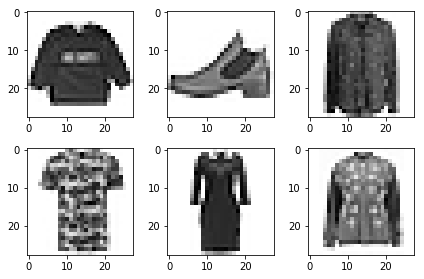

In [36]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(image_df[i][:,:,0], cmap='Greys')
    plt.tight_layout()
#     plt.show() # if show(), subplot doesn't work

# 2. Modeling - CNN

In [37]:
X_train = train_df[feat_cols].values.reshape(-1,28,28,1)/255
X_test = test_df[feat_cols].values.reshape(-1,28,28,1)/255
y_train = np_utils.to_categorical(train_df['label'].values)
y_test = np_utils.to_categorical(test_df['label'].values)

In [38]:
X_test[0].shape

(28, 28, 1)

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(28,28,1), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),batch_size=128, epochs=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.6725 - acc: 0.7524 - val_loss: 0.3550 - val_acc: 0.8671
Epoch 2/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.3585 - acc: 0.8733 - val_loss: 0.2795 - val_acc: 0.8958
Epoch 3/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.2897 - acc: 0.8977 - val_loss: 0.2393 - val_acc: 0.9114
Epoch 4/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.2520 - acc: 0.9112 - val_loss: 0.2284 - val_acc: 0.9173
Epoch 5/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.2281 - acc: 0.9189 - val_loss: 0.2123 - val_acc: 0.9208
Epoch 6/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.2041 - acc: 0.9273 - val_loss: 0.1977 - val_acc: 0.9290
Epoch 7/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.1851 - acc: 0.9345 - val_loss: 0.

Text(0,0.5,'loss')

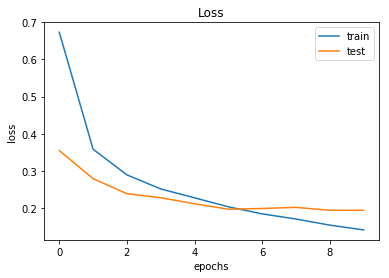

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0,0.5,'loss')

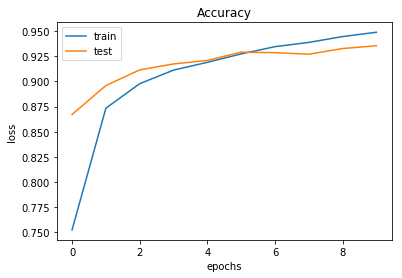

In [42]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Accuracy')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')

# 3.  Summary

[Numpy.nonzero() 详解 numpy module中 nonzero（）函数](https://blog.csdn.net/roler_/article/details/42395393)
```
>>> x = np.array([[1,0,0], [0,2,0], [1,1,0]])
>>> x
array([[1, 0, 0],
       [0, 2, 0],
       [1, 1, 0]])
>>> np.nonzero(x)
(array([0, 1, 2, 2]), array([0, 1, 0, 1])) # non zero row index array, no zero column index array
```

```
>>> a = np.array([[1,2,3],[4,5,6],[7,8,9]])
>>> a > 3
array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])
>>> np.nonzero(a > 3)
(array([1, 1, 1, 2, 2, 2]), array([0, 1, 2, 0, 1, 2]))
```

**one-hot -> label**

In [43]:
y_true = y_test
print(y_true.shape)

(10000, 10)


In [44]:
np.nonzero(y_true)

(array([   0,    1,    2, ..., 9997, 9998, 9999]),
 array([0, 1, 2, ..., 8, 8, 1]))

In [45]:
y_predict = model.predict_classes(X_test)
y_true = np.nonzero(y_true)[1]
print(y_predict.shape)
print(y_true.shape)

(10000,)
(10000,)


In [46]:
y_predict

array([0, 1, 2, ..., 8, 8, 1])

In [47]:
y_true

array([0, 1, 2, ..., 8, 8, 1])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predict, target_names=['class {}'.format(i) for i in range(10)]))

# 精度(precision) = 正确预测的个数(TP)/被预测正确的个数(TP+FP)
# 召回率(recall)=正确预测的个数(TP)/预测个数(TP+FN)
# F1 = 2*精度*召回率/(精度+召回率)

             precision    recall  f1-score   support

    class 0       0.85      0.91      0.88      1000
    class 1       0.99      1.00      0.99      1000
    class 2       0.92      0.89      0.91      1000
    class 3       0.94      0.94      0.94      1000
    class 4       0.89      0.94      0.91      1000
    class 5       0.99      0.98      0.99      1000
    class 6       0.84      0.76      0.80      1000
    class 7       0.95      0.99      0.97      1000
    class 8       0.99      0.99      0.99      1000
    class 9       0.98      0.96      0.97      1000

avg / total       0.94      0.94      0.93     10000



**get index of correct / incoreect**

In [49]:
correct = np.nonzero(y_true == y_predict)[0]
incorrect = np.nonzero(y_true != y_predict)[0]
incorrect[:5]

array([ 3,  5, 16, 43, 51])

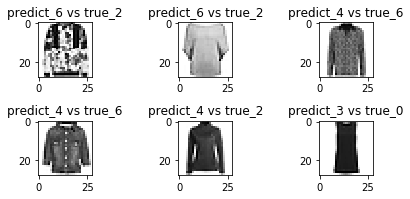

In [50]:
for i, loc in enumerate(incorrect[:6]):
#     print('incorrect predict img location in test set', loc)
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[loc][:,:,0], cmap='Greys')
    plt.title('predict_{} vs true_{}'.format(y_predict[loc], y_true[loc]))
    plt.tight_layout()
# can not use ```for i in incorrect[:6] ```, because i is in []5,7,53,51,...
# when subplot will lead to i+1 > 3*3

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
__________

# Visualization

In [52]:
print(len(model.layers))
model.layers

15


In [53]:
print(model.layers[0].name)
model.layers[0].output

conv2d_7


<tf.Tensor 'conv2d_7/Relu:0' shape=(?, 28, 28, 32) dtype=float32>

In [54]:
model.input

<tf.Tensor 'conv2d_7_input:0' shape=(?, 28, 28, 1) dtype=float32>

In [55]:
from keras import models
models.Model(input=model.input, output=model.layers[0].output)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  


**model.layers[0],  1st conv layer,  to show image of train[1]**

In [56]:
activation_model = models.Model(input=model.input, output=model.layers[0].output)
activations = activation_model.predict(X_train[1].reshape(1,28,28,1))
activations.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


(1, 28, 28, 32)

In [57]:
activations[0].shape

(28, 28, 32)

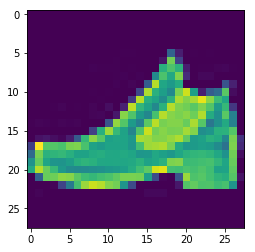

In [58]:
plt.imshow(X_train[1][:,:,0])

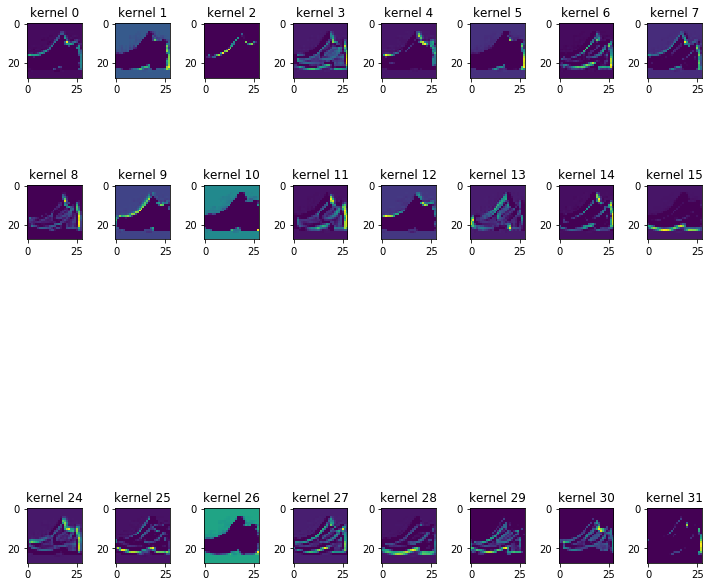

In [59]:
size = 32
plt.figure(figsize=(10,10))
for i in range(size): # i in range(32)，kernel size
    plt.subplot(size/8,8,i+1)
    plt.imshow(activations[0][:,:,i]) # plt.matshow() cannot be shown in subplots
    plt.title('kernel {}'.format(i))
    plt.tight_layout()

(1, 28, 28, 32)
------------------------------------------------------------------------------------------
(1, 28, 28, 32)
------------------------------------------------------------------------------------------
(1, 14, 14, 32)
------------------------------------------------------------------------------------------
(1, 14, 14, 64)
------------------------------------------------------------------------------------------
(1, 14, 14, 64)
------------------------------------------------------------------------------------------
(1, 7, 7, 64)
------------------------------------------------------------------------------------------
(1, 7, 7, 128)
------------------------------------------------------------------------------------------
(1, 7, 7, 128)
------------------------------------------------------------------------------------------
(1, 3, 3, 128)
------------------------------------------------------------------------------------------


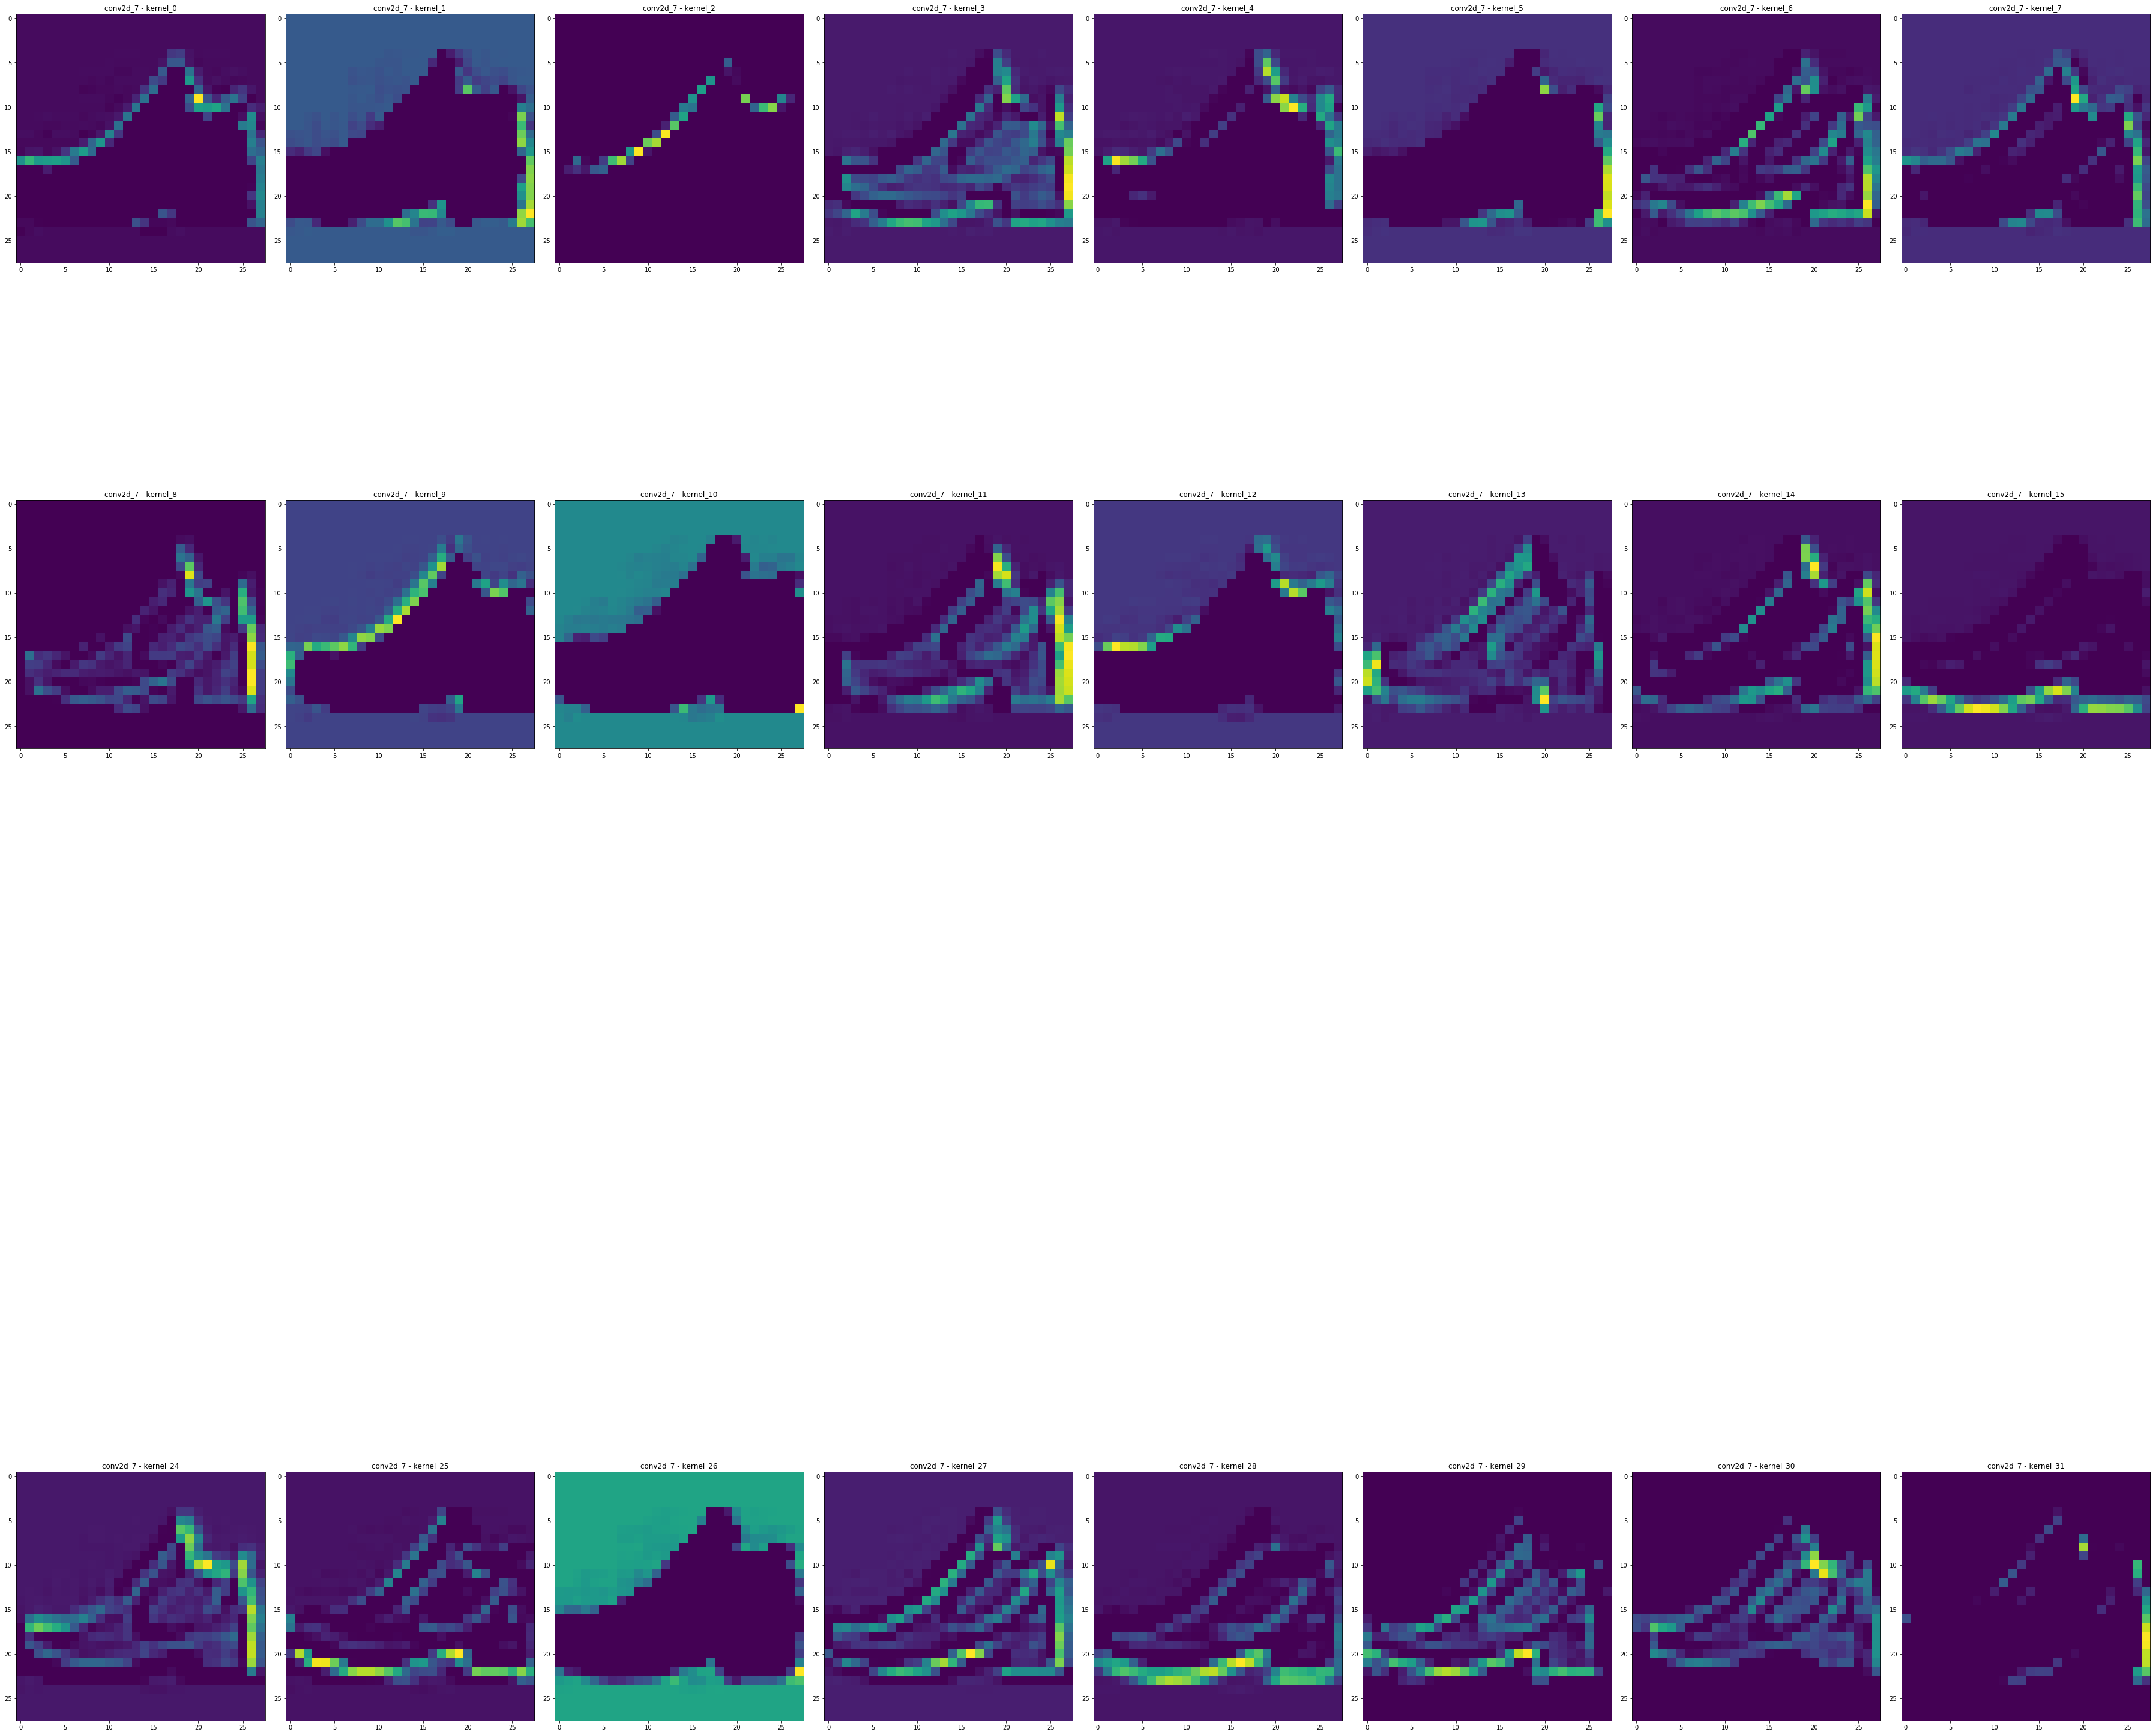

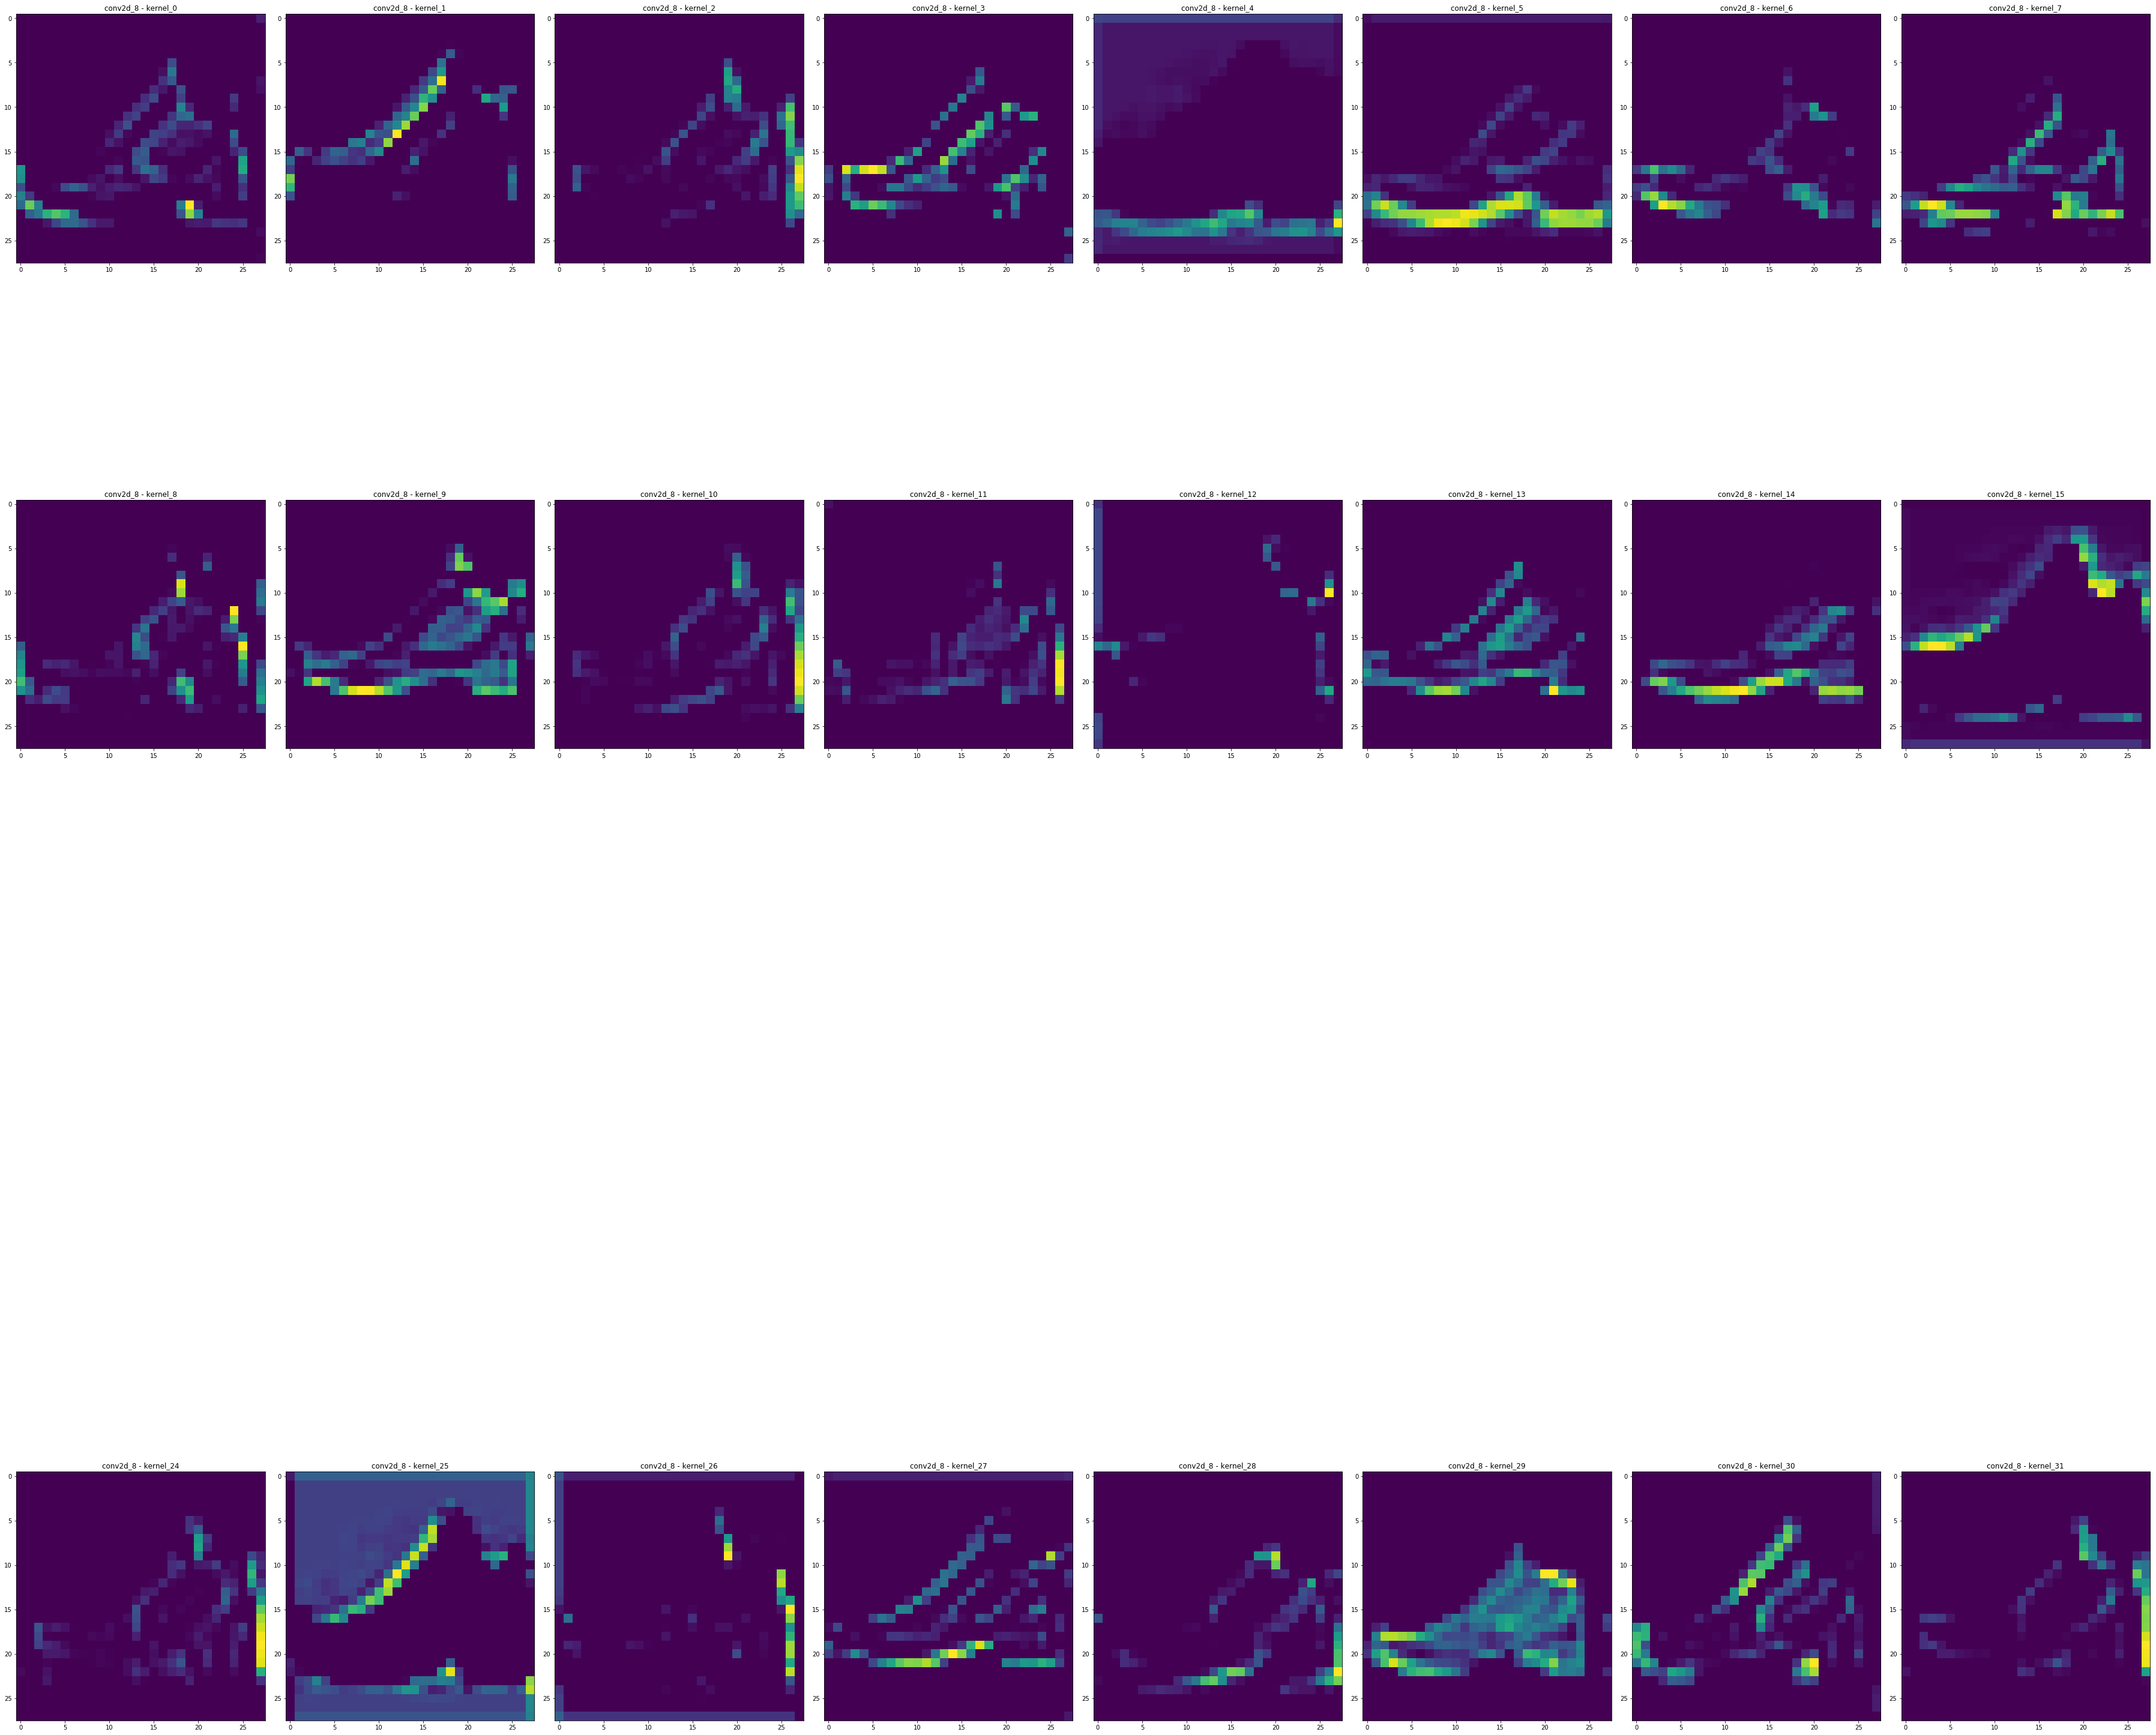

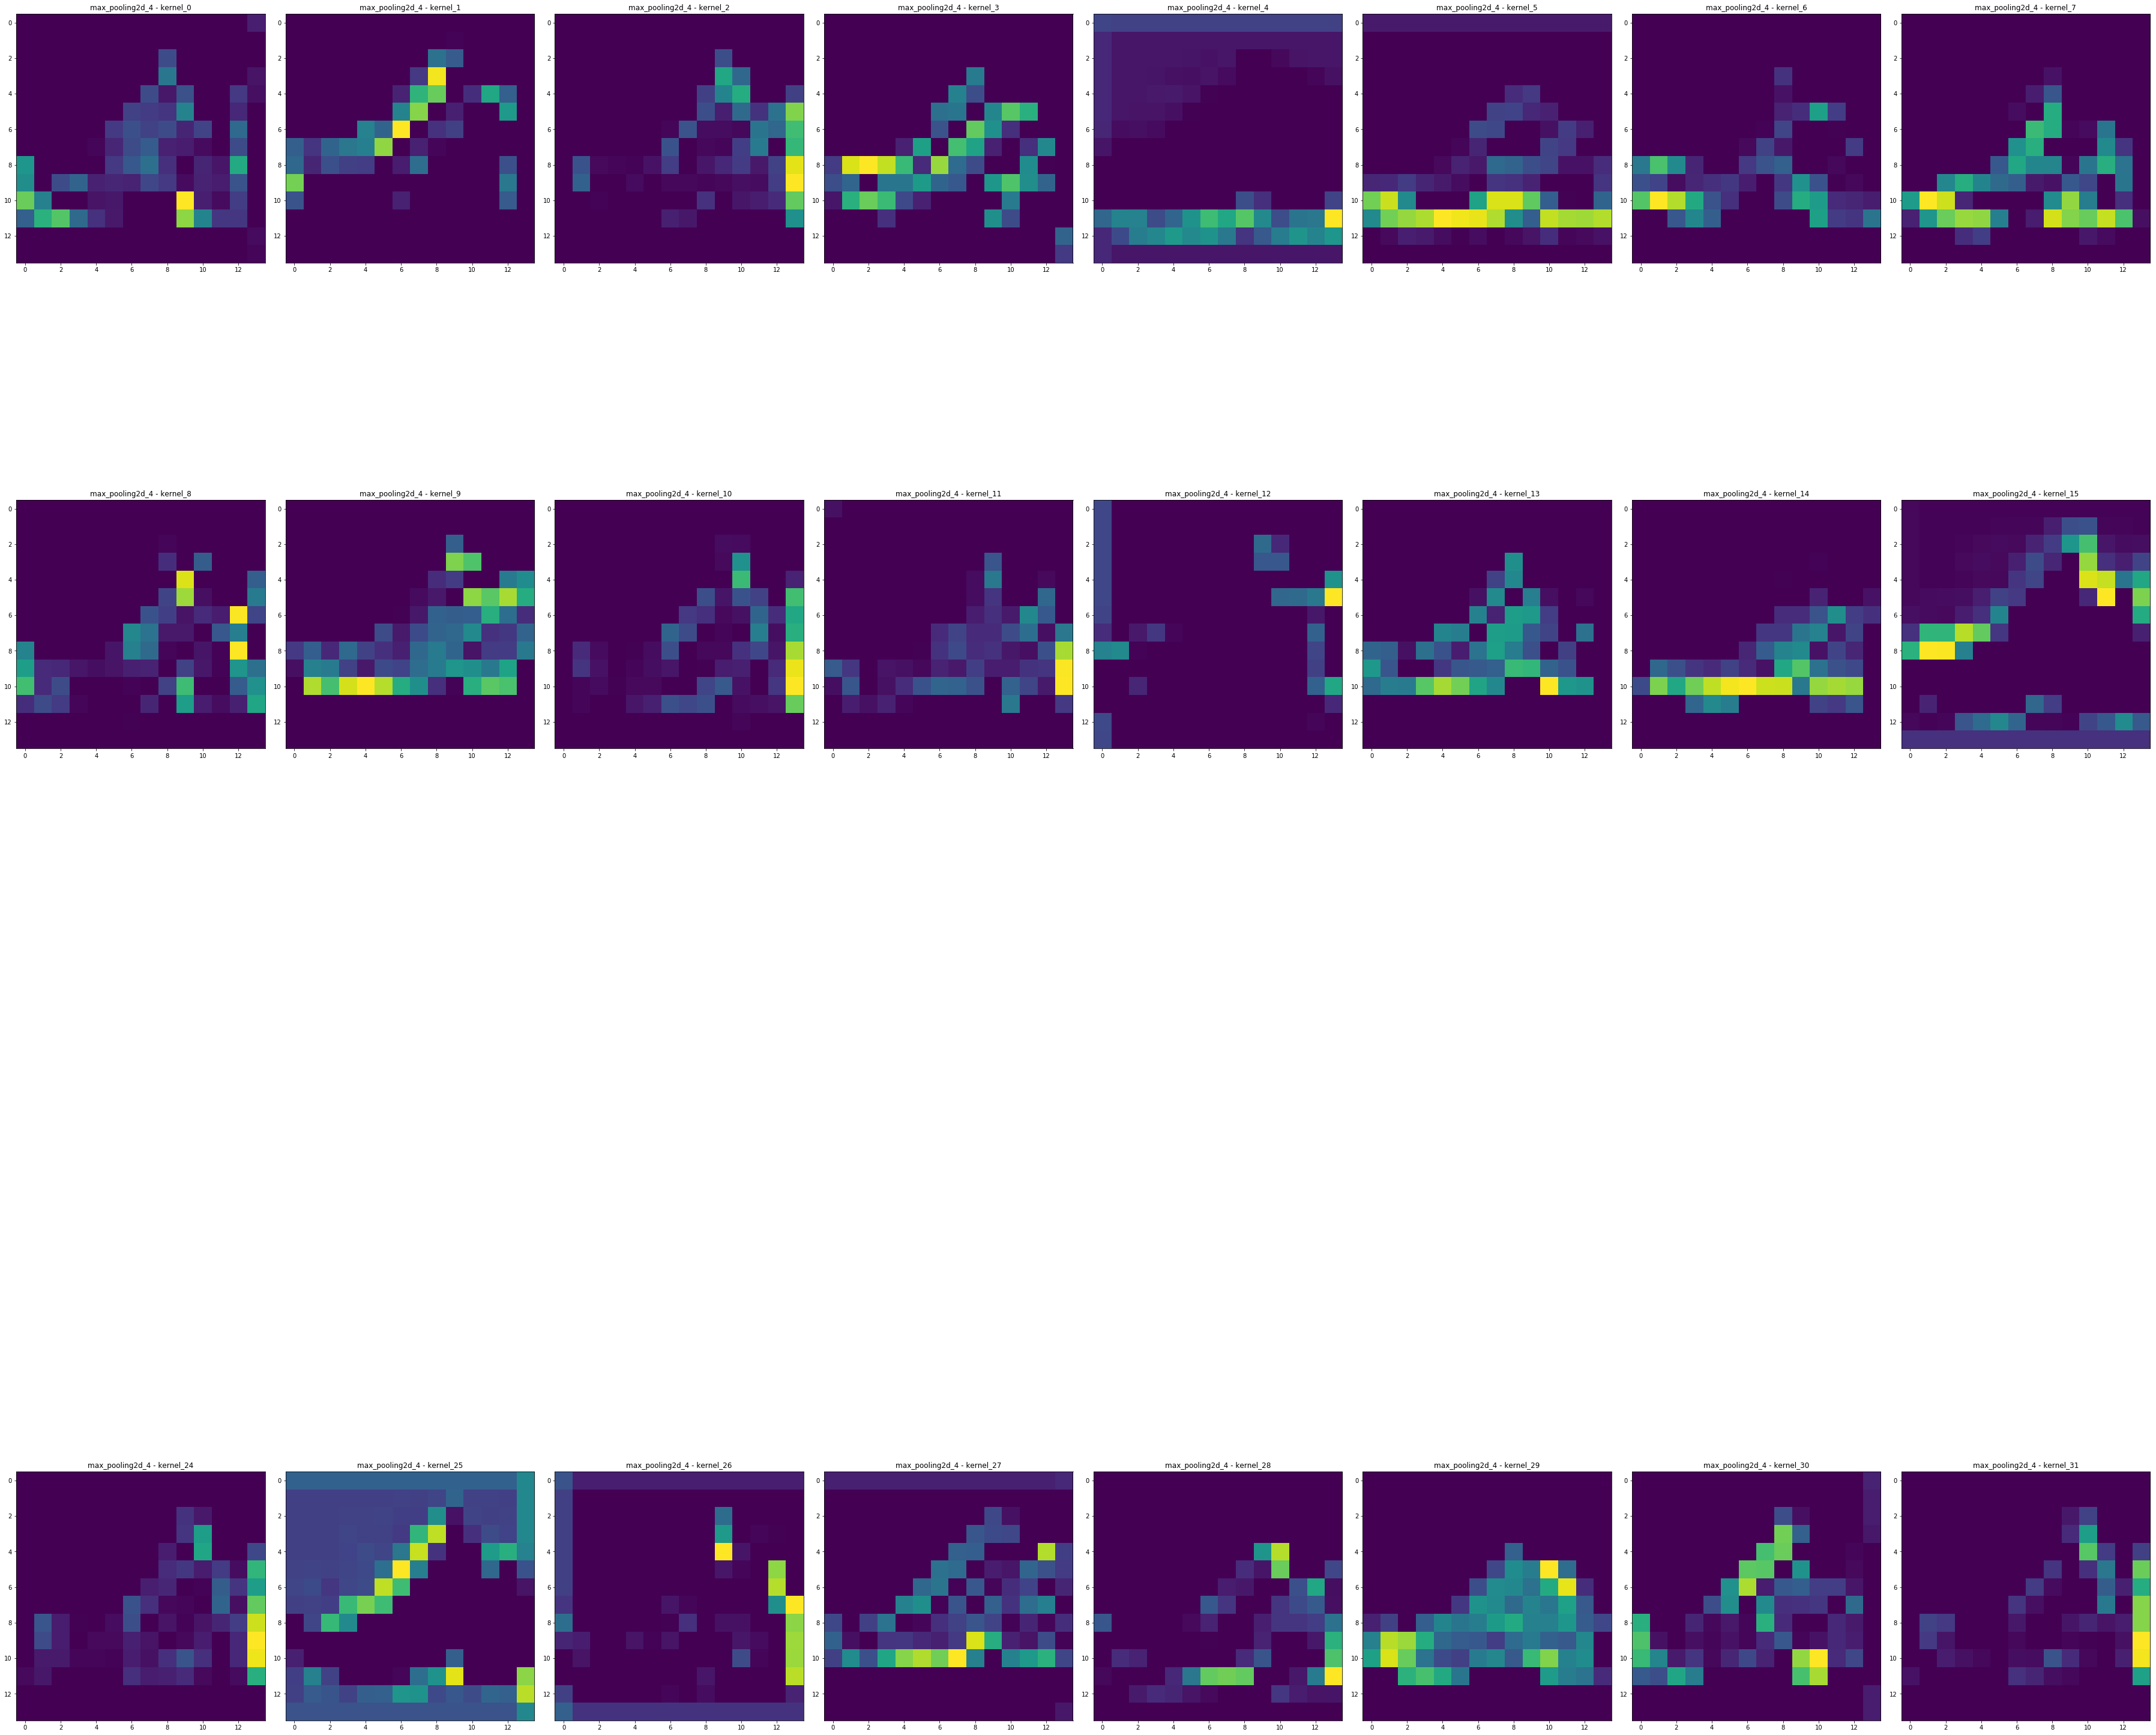

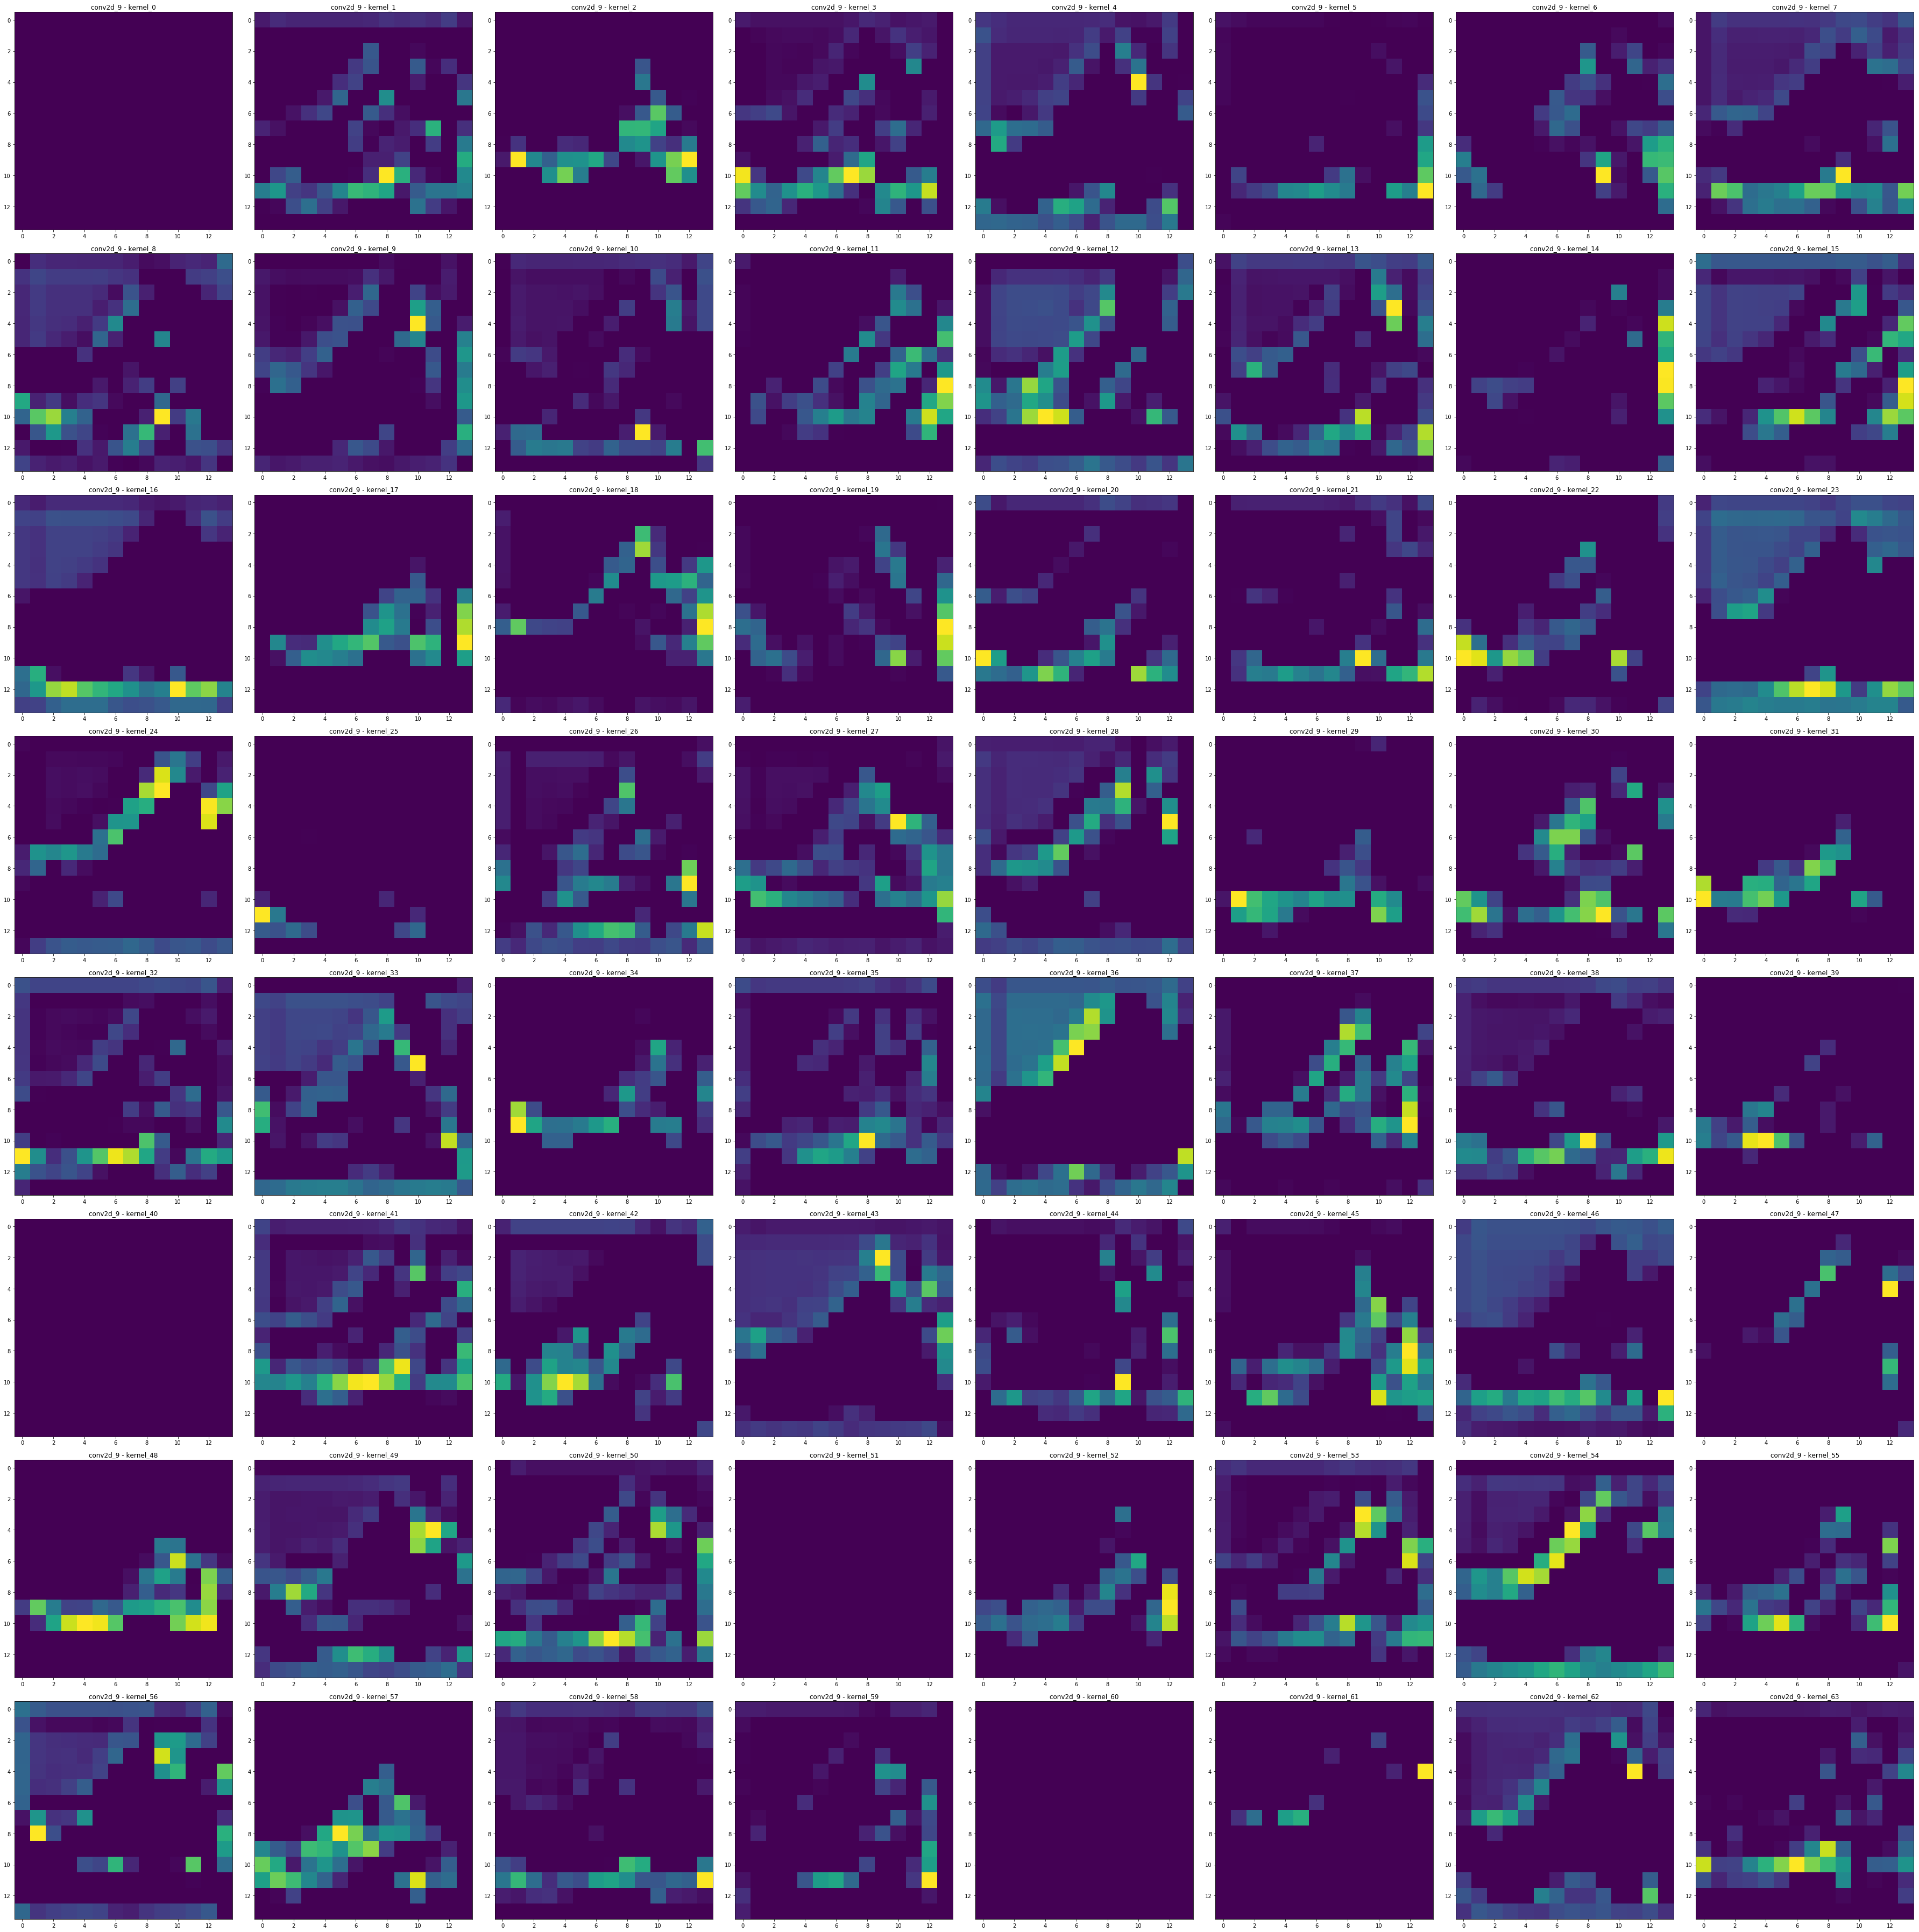

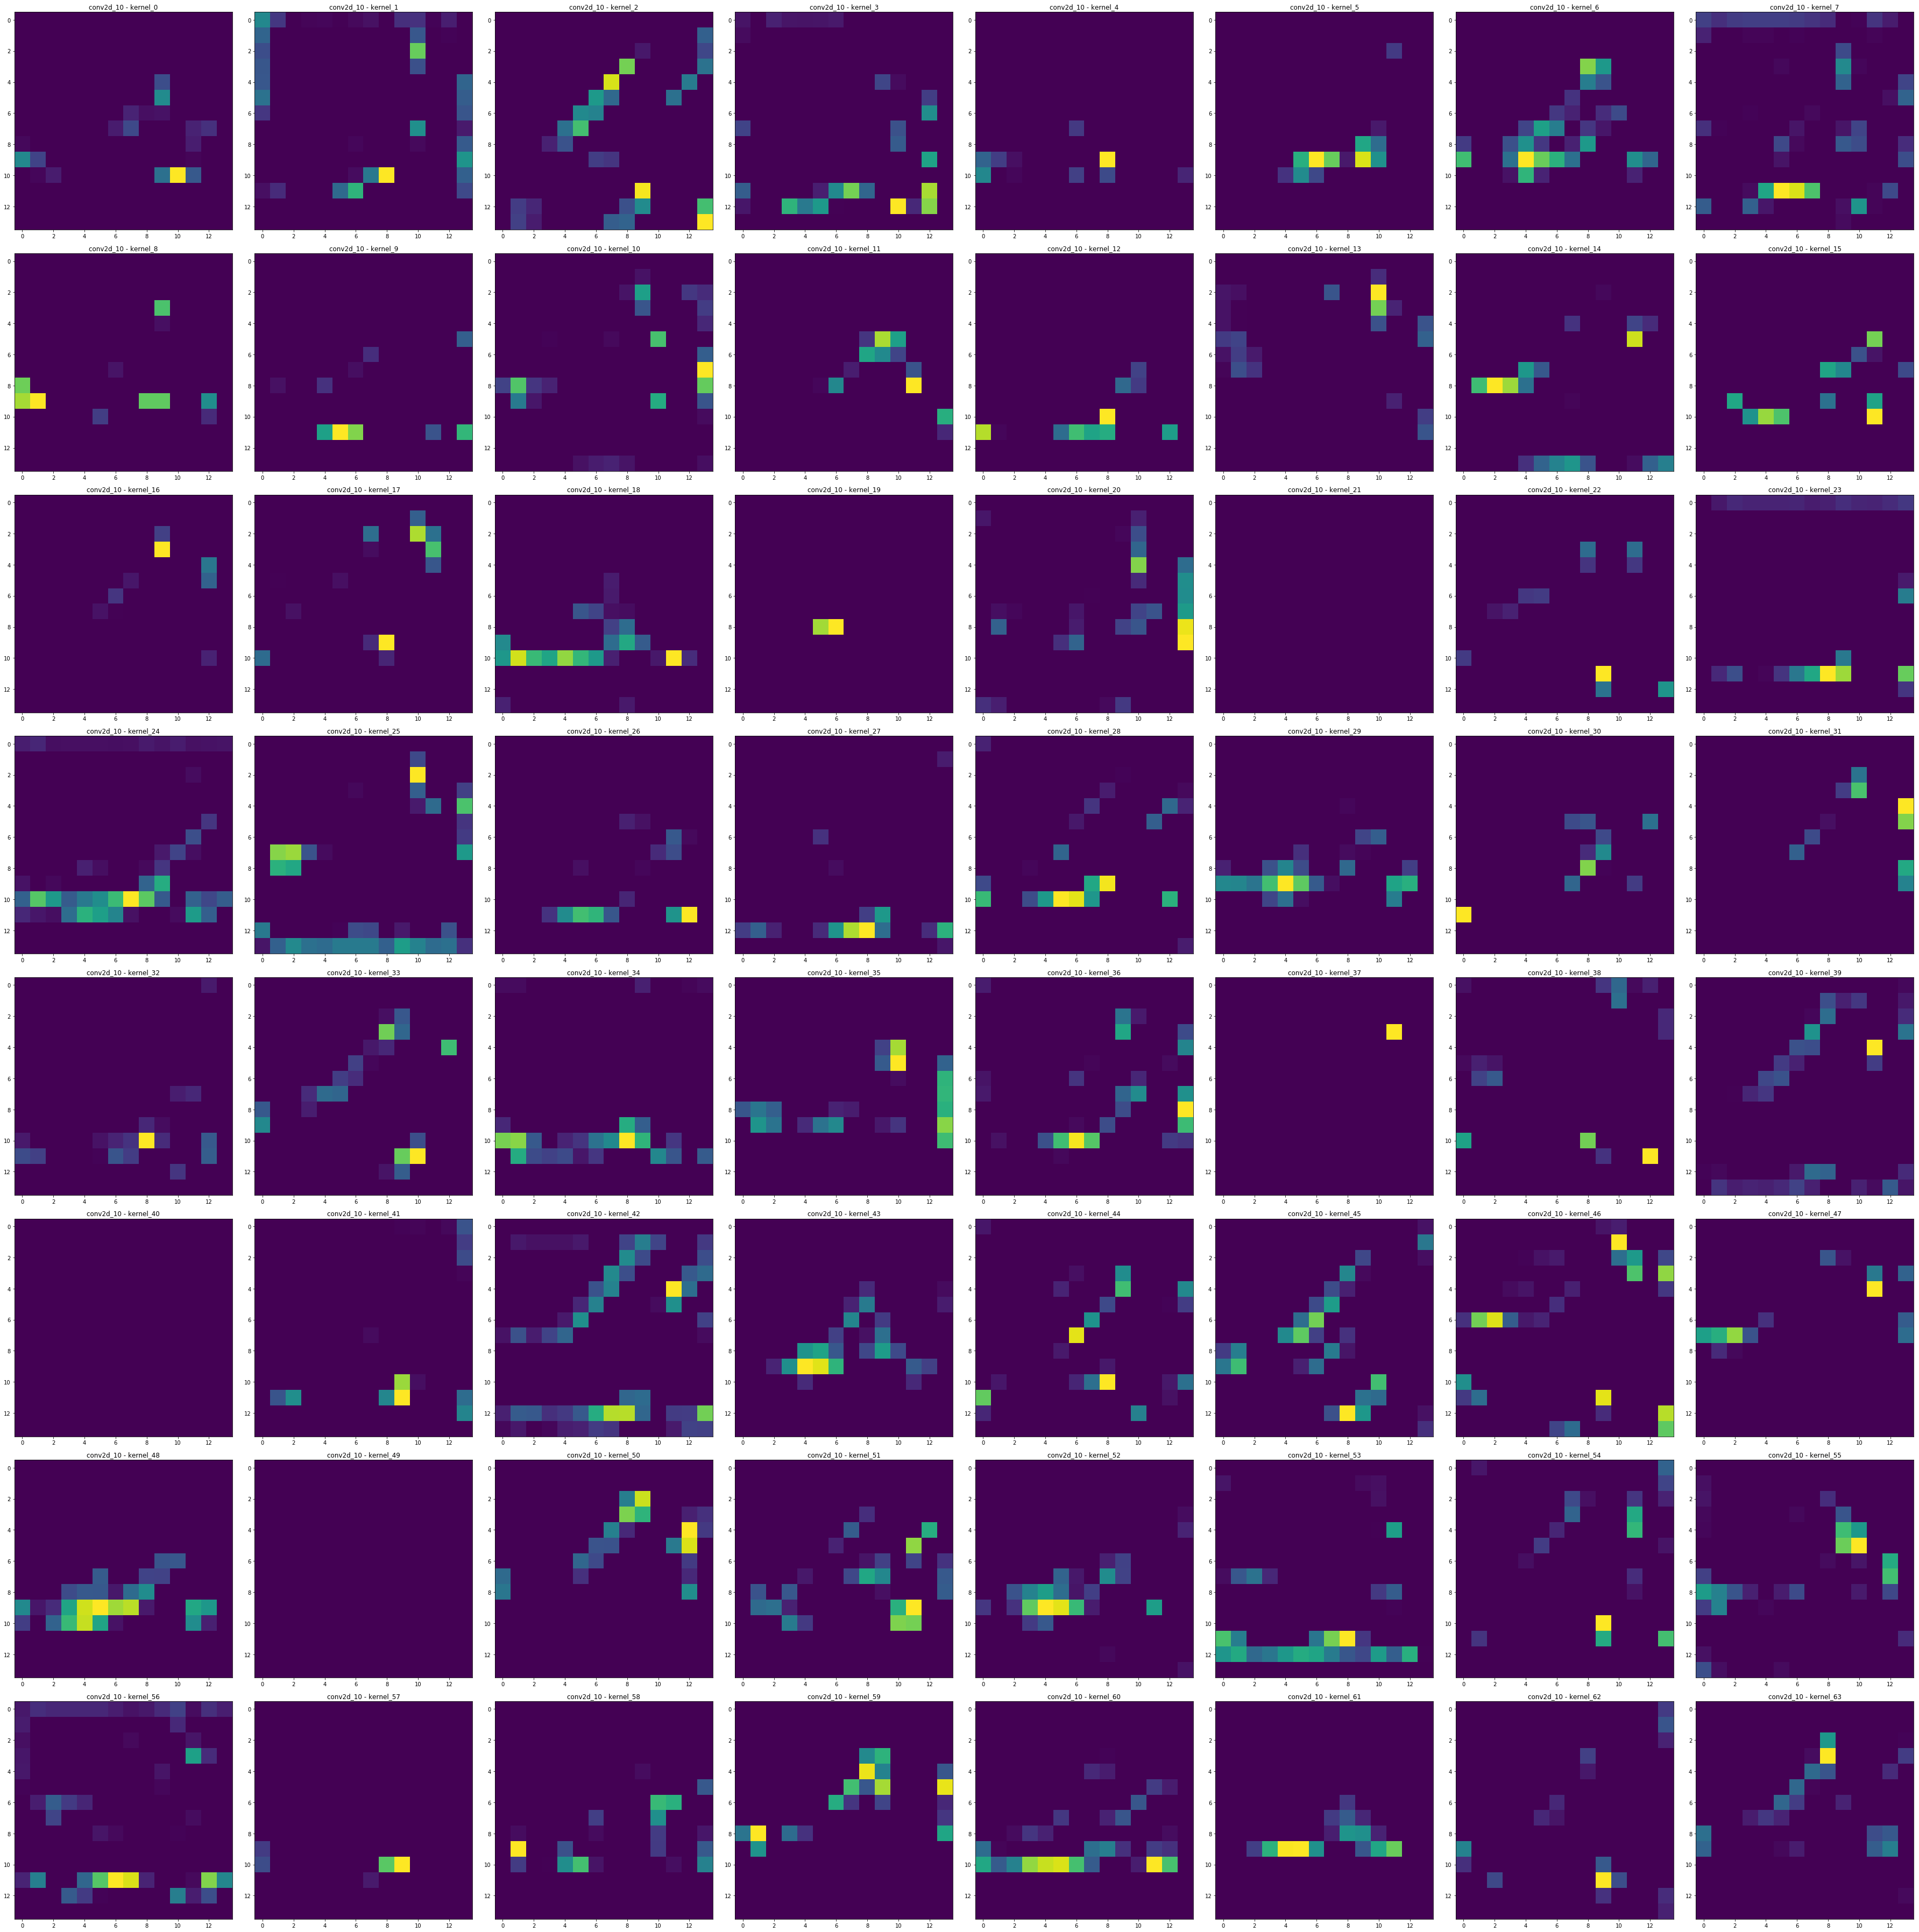

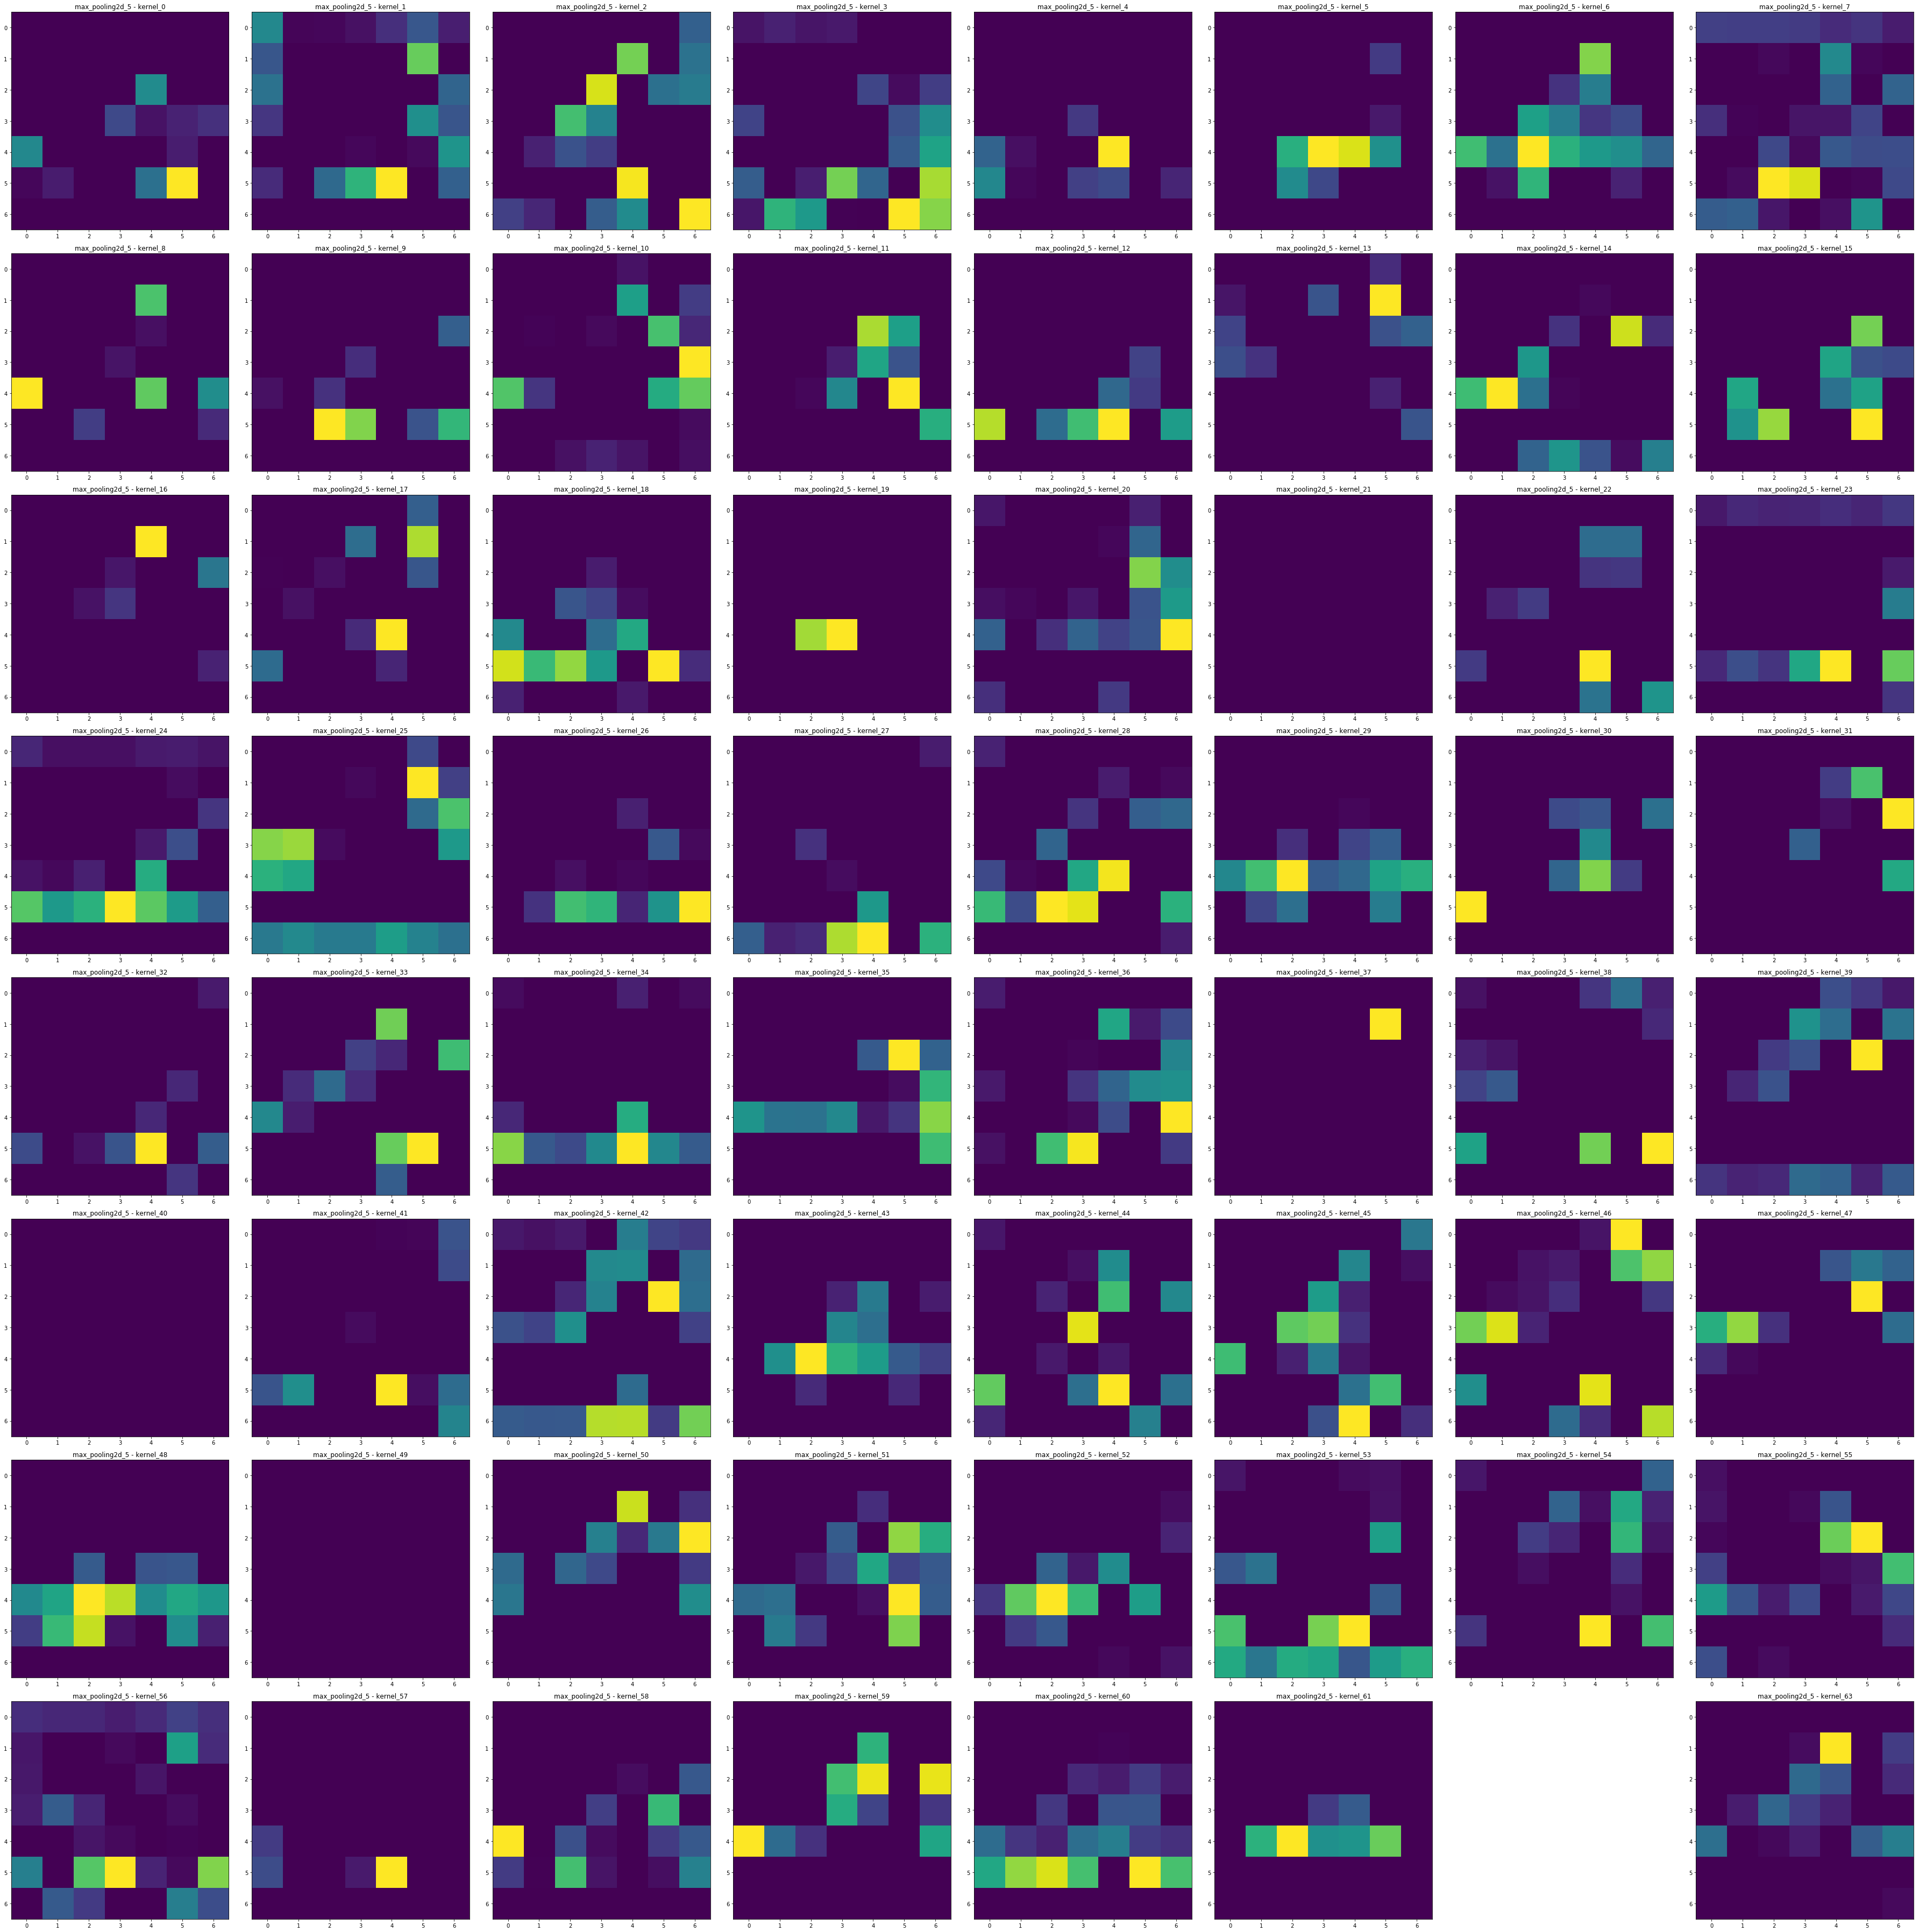

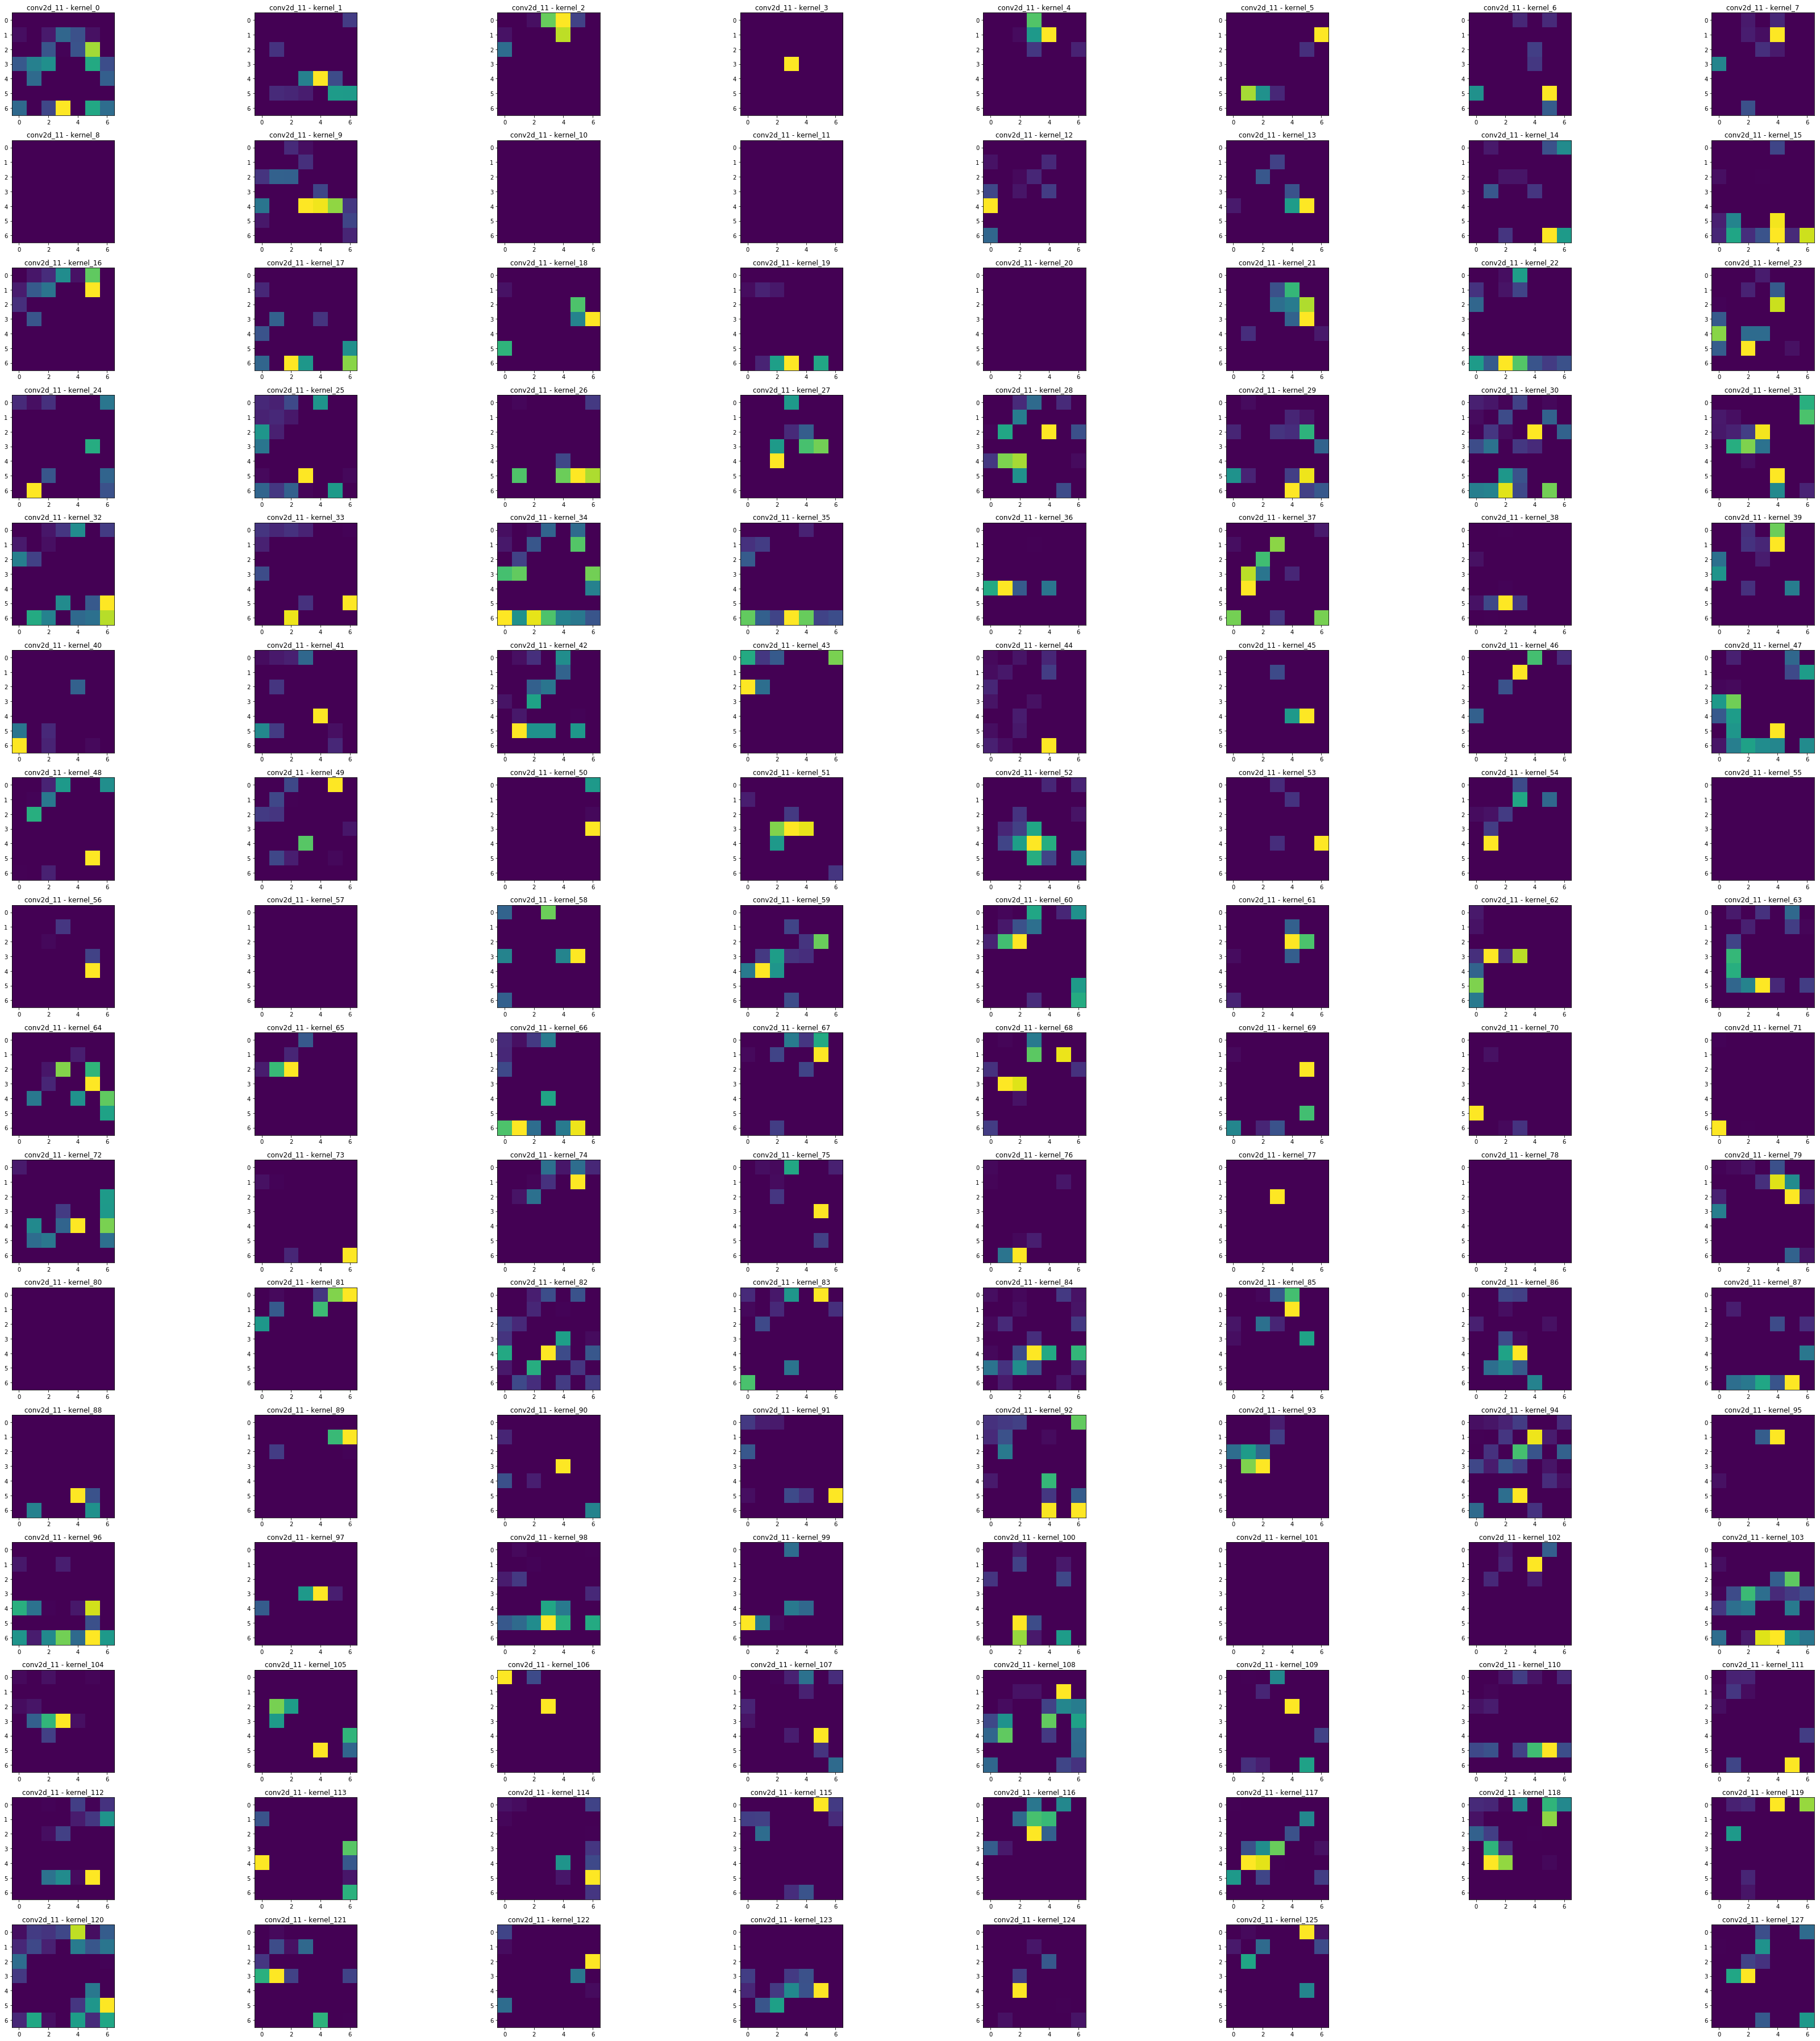

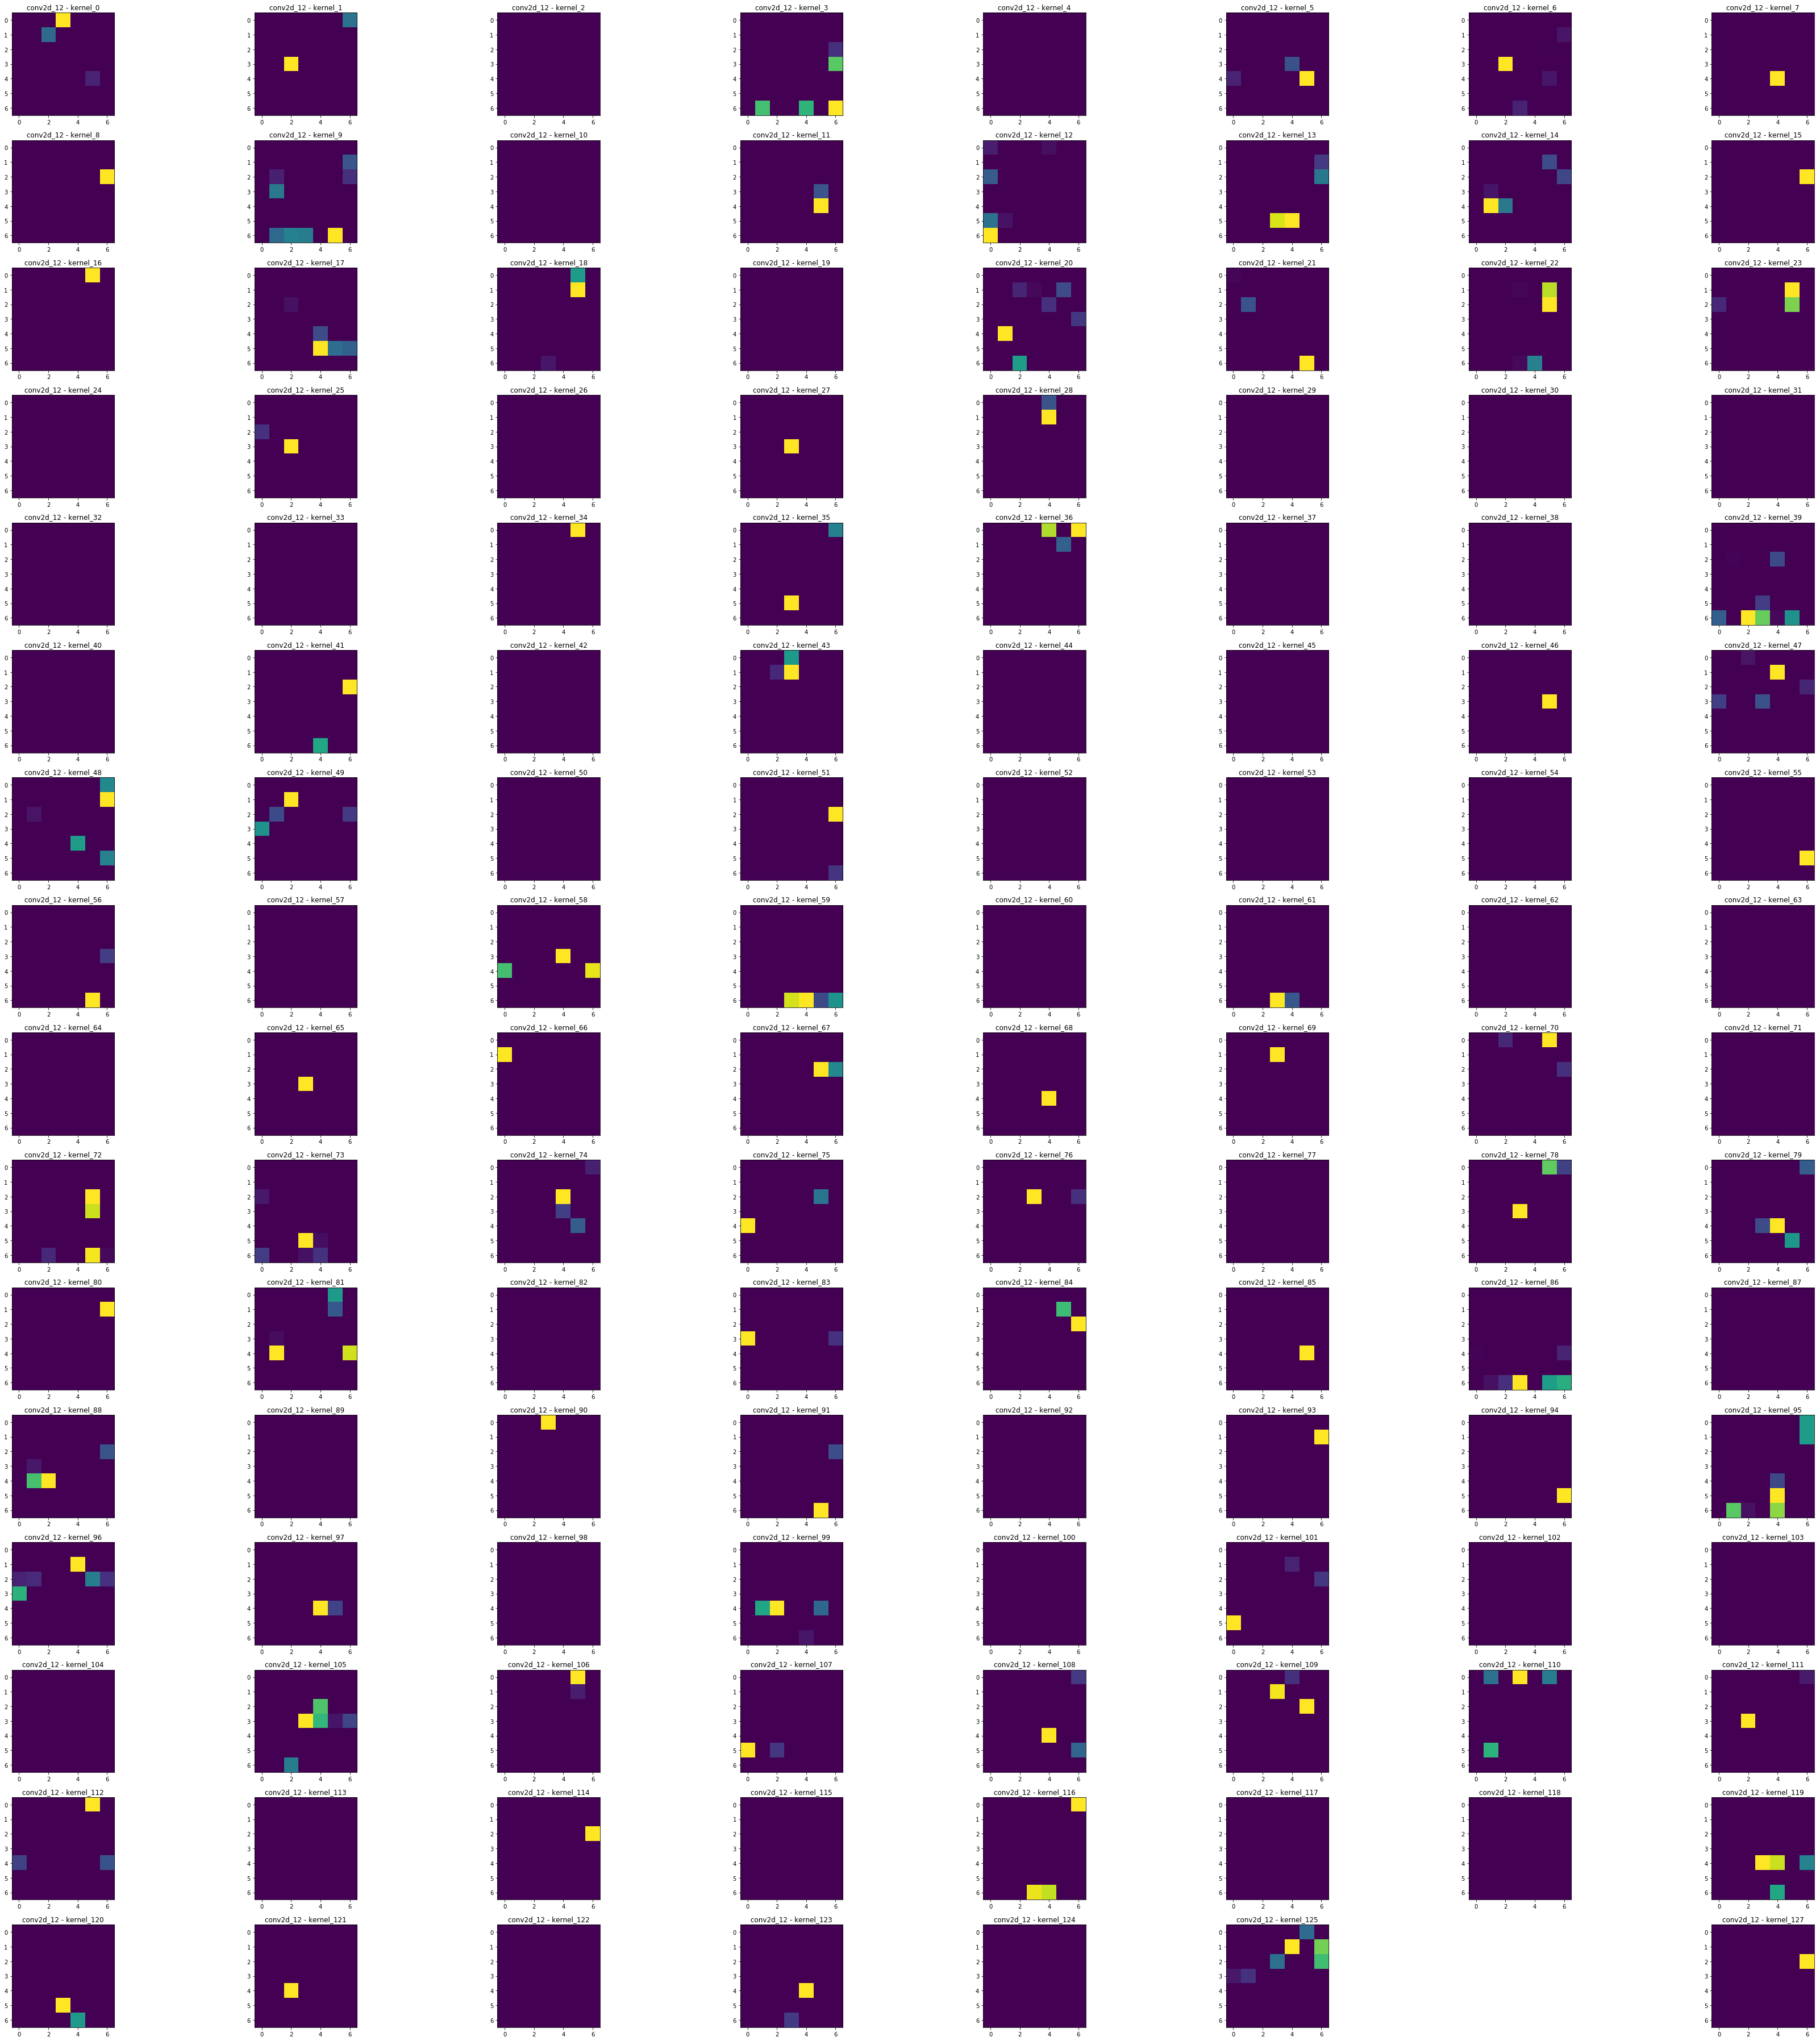

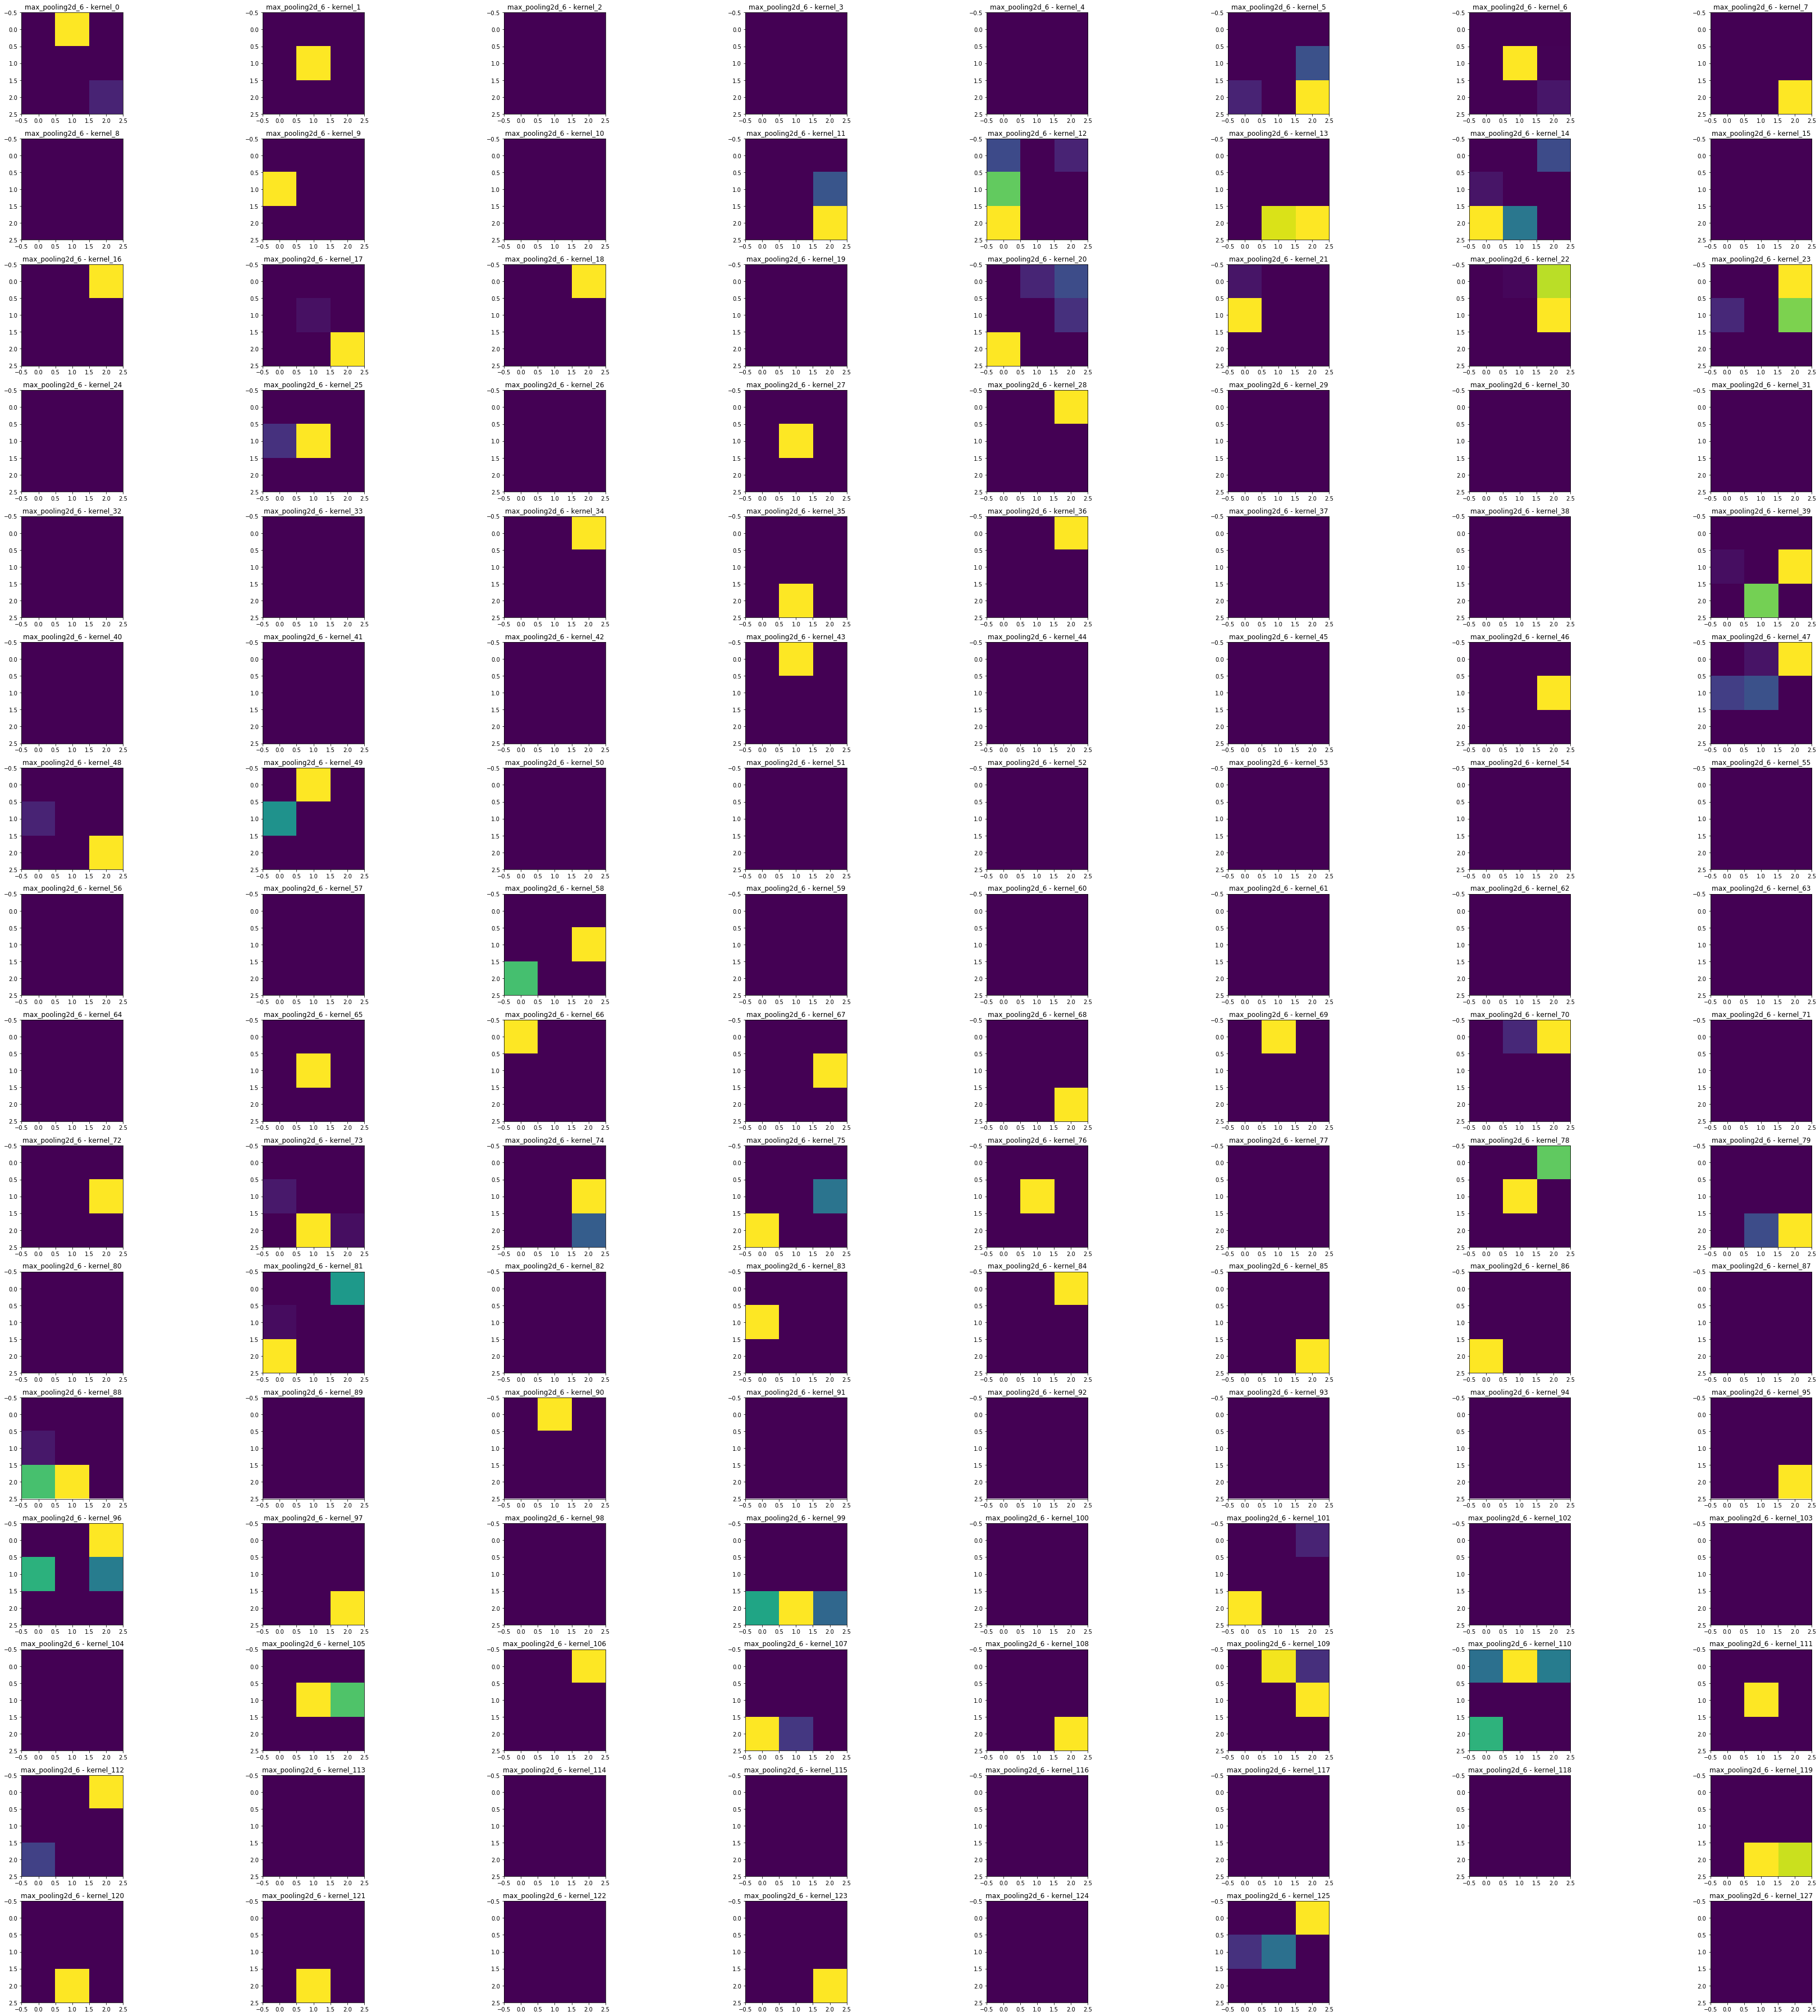

In [60]:
# show conv & maxpooling in all CNN
for i in model.layers[:9]: # first 9 layers are conv neural network
    print(i)
    model_layer = Model(inputs=model.input, outputs=i.output)
    layer_activation = model_layer.predict(X_train[1].reshape(1,28,28,1))
    print(layer_activation.shape)
    kernel_size = layer_activation.shape[-1]
    plt.figure(figsize=(50,50))
    for j in range(kernel_size):
        plt.subplot(kernel_size/8, 8, j+1)
        plt.imshow(layer_activation[0][:,:,j])
        plt.title('{} - kernel_{}'.format(i.name, j))
        plt.tight_layout()
    print('---------'*10)